<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 30px rgba(0,0,0,0.3);'>
    <h1 style='color: white; text-align: center; font-size: 48px; margin: 0; font-weight: 800; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);'>CRÉDIT SCORING</h1>
    <h2 style='color: #e0e7ff; text-align: center; font-size: 28px; margin-top: 15px; font-weight: 300;'>Analyse Exploratoire des Données</h2>
    <p style='color: white; text-align: center; font-size: 16px; margin-top: 20px; opacity: 0.9;'>Projet CLF02 - "Prêt à dépenser"</p>
</div>

<style>
    /* Style global */
    body {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    }
    
    /* Headers stylés */
    h1, h2, h3, h4 {
        font-weight: 700;
    }
    
    /* Sections colorées */
    .section-header {
        background: linear-gradient(90deg, #f093fb 0%, #f5576c 100%);
        padding: 20px;
        border-radius: 10px;
        color: white;
        margin: 30px 0 20px 0;
        box-shadow: 0 5px 15px rgba(0,0,0,0.2);
    }
    
    .info-box {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 20px;
        border-radius: 10px;
        color: white;
        margin: 15px 0;
        box-shadow: 0 5px 15px rgba(0,0,0,0.1);
    }
    
    .warning-box {
        background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%);
        padding: 20px;
        border-radius: 10px;
        color: white;
        margin: 15px 0;
        box-shadow: 0 5px 15px rgba(0,0,0,0.1);
    }
    
    .success-box {
        background: linear-gradient(135deg, #43e97b 0%, #38f9d7 100%);
        padding: 20px;
        border-radius: 10px;
        color: white;
        margin: 15px 0;
        box-shadow: 0 5px 15px rgba(0,0,0,0.1);
    }
    
    /* Badges */
    .badge {
        display: inline-block;
        padding: 8px 15px;
        border-radius: 20px;
        font-size: 14px;
        font-weight: 600;
        margin: 5px;
    }
    
    .badge-primary {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
    }
    
    .badge-success {
        background: linear-gradient(135deg, #43e97b 0%, #38f9d7 100%);
        color: white;
    }
    
    .badge-warning {
        background: linear-gradient(135deg, #fa709a 0%, #fee140 100%);
        color: white;
    }
    
    /* Dividers */
    .divider {
        height: 3px;
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        border: none;
        margin: 30px 0;
        border-radius: 5px;
    }
</style>

<div class='section-header'>
    <h2 style='margin: 0;'>📦 1. SETUP & CHARGEMENT</h2>
</div>

In [1]:
# Imports et configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Taille par défaut des figures
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Imports réussis")

✓ Imports réussis


In [2]:
# Chargement des données
DATA_PATH = Path('../data/merged')

print("Chargement de train_merged.csv...")
df = pd.read_csv(DATA_PATH / 'train_merged.csv')

print(f"✓ Données chargées : {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"Mémoire utilisée : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Chargement de train_merged.csv...
✓ Données chargées : 307,511 lignes × 184 colonnes
Mémoire utilisée : 650.44 MB


<hr class='divider'>

<div class='section-header'>
    <h2 style='margin: 0;'>🔍 2. VUE D'ENSEMBLE</h2>
</div>

<div class='info-box'>
    <h3 style='margin-top: 0;'>📊 Aperçu rapide des données</h3>
    <p>Cette section permet de comprendre la structure globale du dataset : dimensions, types de variables, et premières observations.</p>
</div>

In [3]:
# Aperçu des premières lignes
print("Aperçu des premières lignes :")
df.head(10)

Aperçu des premières lignes :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_BB_MONTHS_BALANCE_MIN_MIN,BUREAU_BB_MONTHS_BALANCE_MAX_MAX,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_CREDIT_ACTIVE_Active,BUREAU_CREDIT_ACTIVE_Bad debt,BUREAU_CREDIT_ACTIVE_Closed,BUREAU_CREDIT_ACTIVE_Sold,BUREAU_CREDIT_TYPE_Another type of loan,BUREAU_CREDIT_TYPE_Car loan,BUREAU_CREDIT_TYPE_Cash loan (non-earmarked),BUREAU_CREDIT_TYPE_Consumer credit,BUREAU_CREDIT_TYPE_Credit card,BUREAU_CREDIT_TYPE_Interbank credit,BUREAU_CREDIT_TYPE_Loan for business development,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending),BUREAU_CREDIT_TYPE_Loan for the purchase of equipment,BUREAU_CREDIT_TYPE_Loan for working capital replenishment,BUREAU_CREDIT_TYPE_Microloan,BUREAU_CREDIT_TYPE_Mobile operator loan,BUREAU_CREDIT_TYPE_Mortgage,BUREAU_CREDIT_TYPE_Real estate loan,BUREAU_CREDIT_TYPE_Unknown type of loan,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_SUM,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_SK_ID_PREV_COUNT,PREV_NAME_CONTRACT_STATUS_Approved,PREV_NAME_CONTRACT_STATUS_Canceled,PREV_NAME_CONTRACT_STATUS_Refused,PREV_NAME_CONTRACT_STATUS_Unused offer,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_SUM,CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_SK_DPD_MAX,CC_SK_DPD_DEF_MAX,INST_PAYMENT_DIFF_MEAN,INST_PAYMENT_DIFF_SUM,INST_DAYS_DELAY_MAX,INST_DAYS_DELAY_MEAN,INST_AMT_PAYMENT_SUM,INST_SK_ID_PREV_COUNT
0,1000

In [4]:
# Informations générales
print("Informations sur le dataset :")
df.info()

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 184 entries, SK_ID_CURR to INST_SK_ID_PREV_COUNT
dtypes: float64(127), int64(41), object(16)
memory usage: 431.7+ MB


In [5]:
# Cellule 3 : Répartition des types de variables
print("\nRépartition des types de variables :")
type_counts = df.dtypes.value_counts()
print(type_counts)



Répartition des types de variables :
float64    127
int64       41
object      16
Name: count, dtype: int64


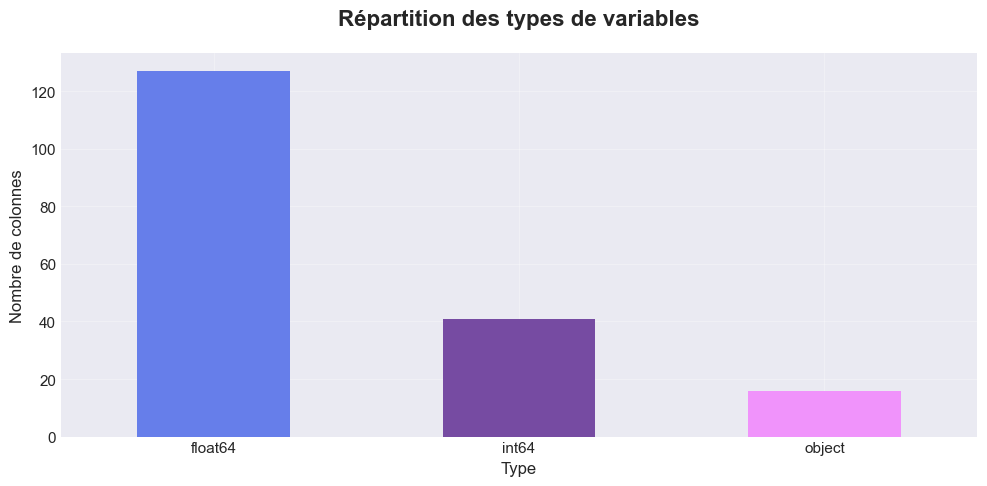

In [6]:
# Visualisation
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#667eea', '#764ba2', '#f093fb', '#43e97b']
type_counts.plot(kind='bar', ax=ax, color=colors[:len(type_counts)])
ax.set_title('Répartition des types de variables', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Type', fontsize=12)
ax.set_ylabel('Nombre de colonnes', fontsize=12)
ax.grid(alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 🕳️ Analyse des valeurs manquantes

In [17]:
# Calcul des valeurs manquantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs_manquantes': missing.values,
    'Pourcentage': missing_pct.values
})
#colonnes avec des valeurs manquantes
missing_df = missing_df[missing_df['Valeurs_manquantes'] > 0].sort_values('Pourcentage', ascending=False)
print(f"\nColonnes avec valeurs manquantes : {len(missing_df)} / {df.shape[1]}")
print(f"\nTop 20 colonnes avec le plus de valeurs manquantes :")
missing_df.head(20)


Colonnes avec valeurs manquantes : 129 / 184

Top 20 colonnes avec le plus de valeurs manquantes :


,Colonne,Valeurs_manquantes,Pourcentage
176,CC_SK_DPD_MAX,220606,71.739222
177,CC_SK_DPD_DEF_MAX,220606,71.739222
174,CC_AMT_BALANCE_SUM,220606,71.739222
175,CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN,220606,71.739222
173,CC_AMT_BALANCE_MEAN,220606,71.739222
132,BUREAU_BB_MONTHS_BALANCE_MAX_MAX,215280,70.007252
131,BUREAU_BB_MONTHS_BALANCE_MIN_MIN,215280,70.007252
62,COMMONAREA_MODE,214865,69.872297
48,COMMONAREA_AVG,214865,69.872297
76,COMMONAREA_MEDI,214865,69.872297


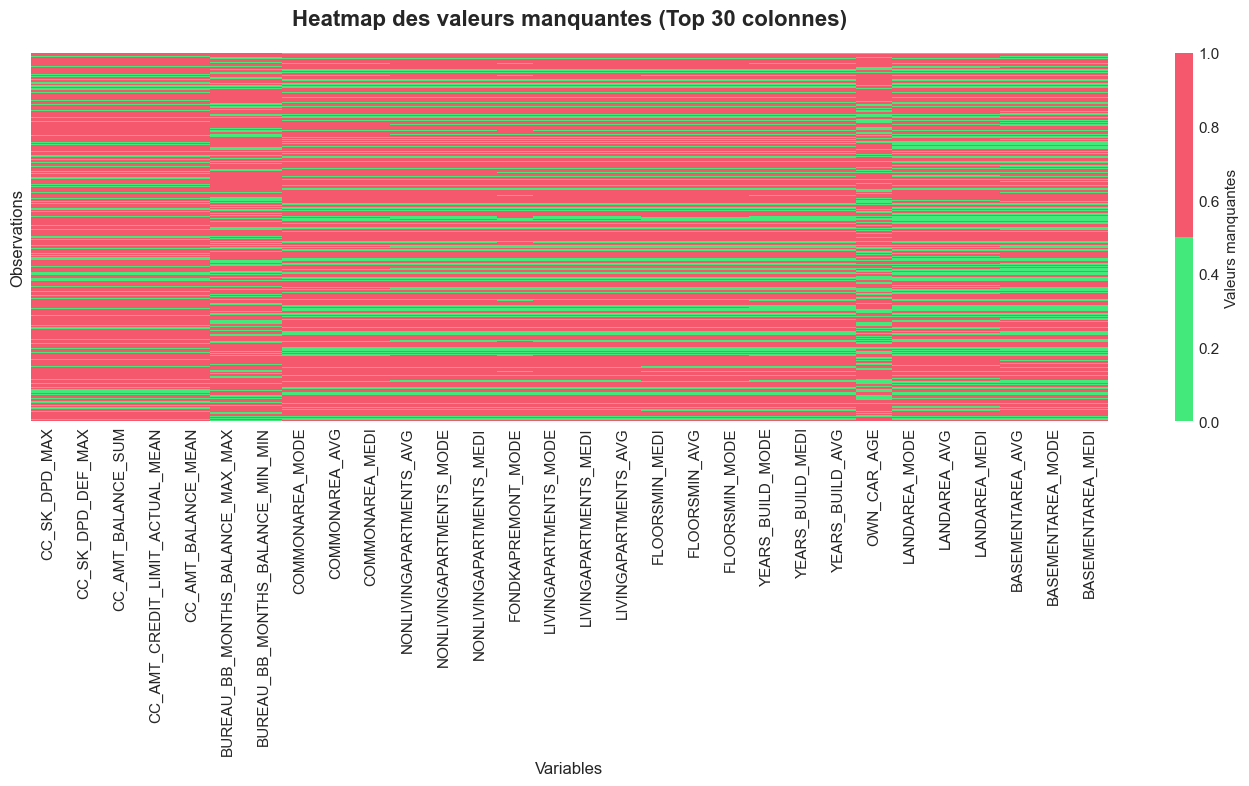

In [18]:
# Heatmap des valeurs manquantes
if len(missing_df) > 0:
    top_missing_cols = missing_df.head(30)['Colonne'].tolist()
    
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.heatmap(
        df[top_missing_cols].isnull(),
        cmap=['#43e97b', '#f5576c'],
        cbar_kws={'label': 'Valeurs manquantes'},
        ax=ax,
        yticklabels=False
    )
    ax.set_title('Heatmap des valeurs manquantes (Top 30 colonnes)', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Variables', fontsize=12)
    ax.set_ylabel('Observations', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("✓ Aucune valeur manquante détectée !")

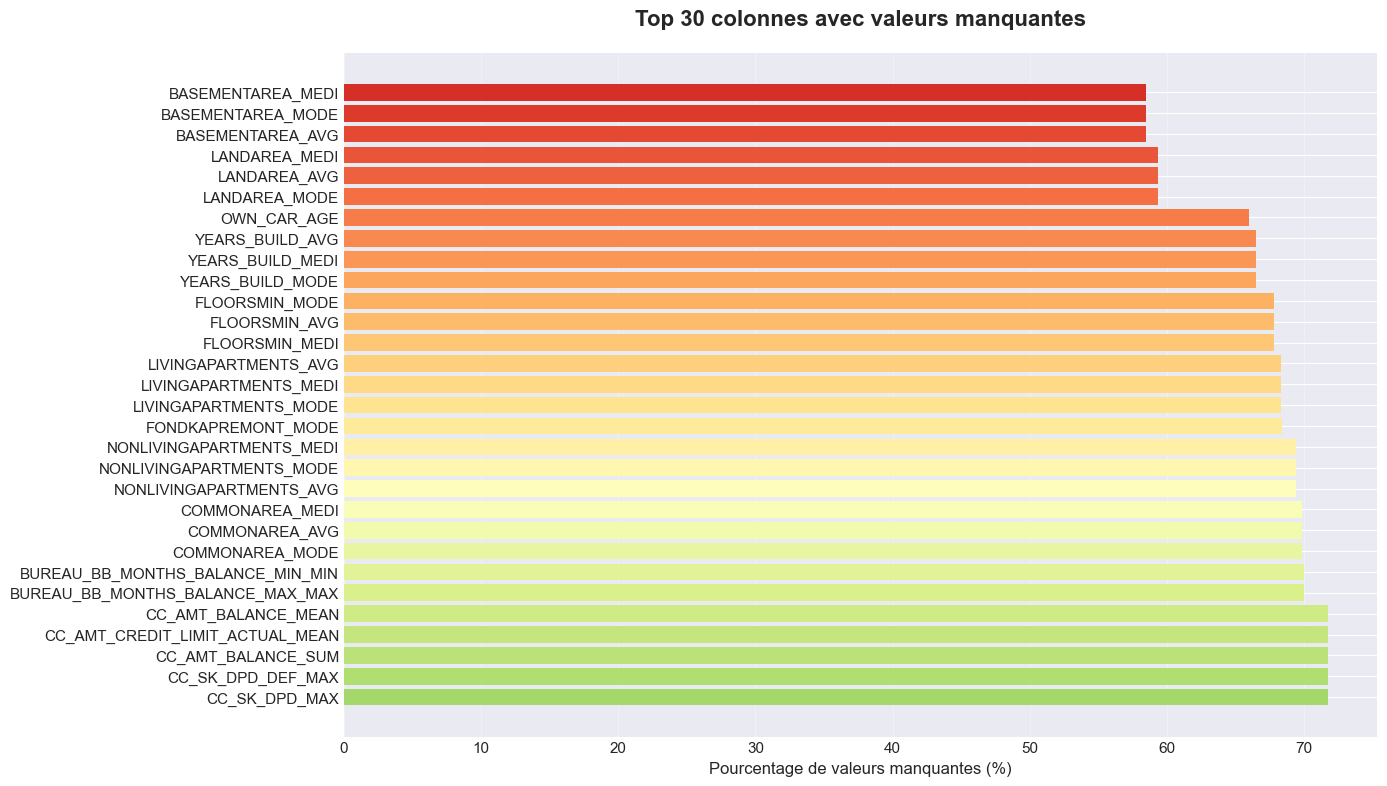

In [ ]:
# Barplot pourcentage valeurs manquantes
if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(14, 8))
    top_30_missing = missing_df.head(30)
    
    colors_gradient = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(top_30_missing)))
    
    ax.barh(top_30_missing['Colonne'], top_30_missing['Pourcentage'], color=colors_gradient)
    ax.set_xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    ax.set_title('Top 30 colonnes avec valeurs manquantes', fontsize=16, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
# Statistiques descriptives
print("\nStatistiques descriptives des variables numériques :")
df.describe()


Statistiques descriptives des variables numériques :


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_BB_MONTHS_BALANCE_MIN_MIN,BUREAU_BB_MONTHS_BALANCE_MAX_MAX,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_CREDIT_ACTIVE_Active,BUREAU_CREDIT_ACTIVE_Bad debt,BUREAU_CREDIT_ACTIVE_Closed,BUREAU_CREDIT_ACTIVE_Sold,BUREAU_CREDIT_TYPE_Another type of loan,BUREAU_CREDIT_TYPE_Car loan,BUREAU_CREDIT_TYPE_Cash loan (non-earmarked),BUREAU_CREDIT_TYPE_Consumer credit,BUREAU_CREDIT_TYPE_Credit card,BUREAU_CREDIT_TYPE_Interbank credit,BUREAU_CREDIT_TYPE_Loan for business development,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending),BUREAU_CREDIT_TYPE_Loan for the purchase of equipment,BUREAU_CREDIT_TYPE_Loan for working capital replenishment,BUREAU_CREDIT_TYPE_Microloan,BUREAU_CREDIT_TYPE_Mobile operator loan,BUREAU_CREDIT_TYPE_Mortgage,BUREAU_CREDIT_TYPE_Real estate loan,BUREAU_CREDIT_TYPE_Unknown type of loan,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_SUM,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_SK_ID_PREV_COUNT,PREV_NAME_CONTRACT_STATUS_Approved,PREV_NAME_CONTRACT_STATUS_Canceled,PREV_NAME_CONTRACT_STATUS_Refused,PREV_NAME_CONTRACT_STATUS_Unused offer,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_SUM,CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_SK_DPD_MAX,CC_SK_DPD_DEF_MAX,INST_PAYMENT_DIFF_MEAN,INST_PAYMENT_DIFF_SUM,INST_DAYS_DELAY_MAX,INST_DAYS_DELAY_MEAN,INST_AMT_PAYMENT_SUM,INST_SK_ID_PREV_COUNT
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.

**Conclusion** : Ces valeurs manquantes sont normales dans ce contexte métier. Ce ne sont pas des erreurs de collecte mais des absences d'information légitimes.

**Verification de cette hypothèse**

**OBJECTIF** : Prouver que les NaN ne sont PAS des erreurs
Il existe 3 types de valeurs manquantes :

- MCAR (Missing Completely At Random) = Erreur aléatoire → Problème
- MAR (Missing At Random) = Dépend d'autres variables → Gérable
- MNAR (Missing Not At Random) = L'absence EST une information → Normal

Notre hypothèse : Les NaN sont MNAR (légitimes)

**ÉTAPE 1 : Vérifier la cohérence structurelle**

**Principe** :
Si les NaN viennent d'un LEFT JOIN (fusion de tables), alors :
- Un client AVEC historique Bureau → TOUTES ses colonnes Bureau remplies  
- Un client SANS historique Bureau → TOUTES ses colonnes Bureau = NaN

In [ ]:
# Si un client a UNE colonne Bureau non-NaN, combien d'autres colonnes Bureau a-t-il ?
bureau_cols = [col for col in df.columns if col.startswith('BUREAU_')]
has_bureau = df[bureau_cols].notna().any(axis=1)  # Clients avec au moins 1 valeur

# Pour ces clients, % de colonnes remplies
for col in bureau_cols[:5]:
    pct_filled = df.loc[has_bureau, col].notna().mean() * 100
    print(f"{col}: {pct_filled:.1f}%")

BUREAU_DAYS_CREDIT_MIN: 100.0%
BUREAU_DAYS_CREDIT_MAX: 100.0%
BUREAU_DAYS_CREDIT_MEAN: 100.0%
BUREAU_AMT_CREDIT_SUM_MEAN: 100.0%
BUREAU_AMT_CREDIT_SUM_SUM: 100.0%


Interprétation Étape 1 : Cohérence structurelle  
✓ VALIDÉ À 100%  
Ce que ça signifie :  

Tous les clients qui ont au moins une colonne Bureau remplie ont TOUTES leurs colonnes Bureau remplies
Il n'y a AUCUN cas où un client a certaines colonnes Bureau remplies et d'autres vides
C'est la preuve parfaite d'un LEFT JOIN : soit le client a un historique Bureau complet, soit il n'en a aucun

**ÉTAPE 2 : Vérifier la logique métier**

Principe :  
Certaines variables ne peuvent PAS exister dans certains cas.

In [19]:
# Clients SANS voiture
no_car = df[df['FLAG_OWN_CAR'] == 'N']
pct_nan = no_car['OWN_CAR_AGE'].isna().mean() * 100
print(f"Clients sans voiture avec OWN_CAR_AGE=NaN : {pct_nan:.1f}%")

Clients sans voiture avec OWN_CAR_AGE=NaN : 100.0%


Conclusion :
Les NaN dans OWN_CAR_AGE sont LOGIQUES et MÉTIER ✓

**ÉTAPE 3 : Comparer les profils clients**

Principe :  
Si les NaN étaient aléatoires (erreur), les clients avec/sans NaN auraient les mêmes caractéristiques.   
Si les NaN sont légitimes, les profils seront différents.  

In [20]:
# Clients avec/sans EXT_SOURCE_1
has_ext1 = df[df['EXT_SOURCE_1'].notna()]
no_ext1 = df[df['EXT_SOURCE_1'].isna()]

# Comparer leurs revenus
print(f"Revenu moyen AVEC EXT_SOURCE_1 : {has_ext1['AMT_INCOME_TOTAL'].mean():,.0f}")
print(f"Revenu moyen SANS EXT_SOURCE_1 : {no_ext1['AMT_INCOME_TOTAL'].mean():,.0f}")

Revenu moyen AVEC EXT_SOURCE_1 : 176,904
Revenu moyen SANS EXT_SOURCE_1 : 162,527


Conclusion :  
Les NaN dans EXT_SOURCE_1 sont NON ALÉATOIRES (MNAR) → L'absence de score EST une information sur le profil client ✓

**ÉTAPE 4 : Crosstab (corrélation entre sources)**

Principe :  
Si un client a un historique Bureau, a-t-il aussi une carte de crédit ?    
Si oui → Corrélation logique (client établi)  

In [22]:
# Étape 4 : Crosstab entre sources de données
print("ÉTAPE 4 : CORRÉLATION ENTRE SOURCES DE DONNÉES")
print("-" * 50)

# Définir les colonnes par source
bureau_cols = [col for col in df.columns if col.startswith('BUREAU_')]
cc_cols = [col for col in df.columns if col.startswith('CC_')]
prev_cols = [col for col in df.columns if col.startswith('PREV_')]
pos_cols = [col for col in df.columns if col.startswith('POS_')]
inst_cols = [col for col in df.columns if col.startswith('INST_')]

# Créer indicateurs de présence
presence = pd.DataFrame({
    'HAS_BUREAU': df[bureau_cols].notna().any(axis=1).astype(int) if bureau_cols else 0,
    'HAS_CC': df[cc_cols].notna().any(axis=1).astype(int) if cc_cols else 0,
    'HAS_PREV': df[prev_cols].notna().any(axis=1).astype(int) if prev_cols else 0,
    'HAS_POS': df[pos_cols].notna().any(axis=1).astype(int) if pos_cols else 0,
    'HAS_INST': df[inst_cols].notna().any(axis=1).astype(int) if inst_cols else 0
})

# Crosstab Bureau vs Credit Card
print("\nCrosstab : BUREAU vs CREDIT CARD")
print(pd.crosstab(presence['HAS_BUREAU'], presence['HAS_CC'], margins=True))

print("\nCrosstab : BUREAU vs PREVIOUS APPLICATION")
print(pd.crosstab(presence['HAS_BUREAU'], presence['HAS_PREV'], margins=True))

print("\nCrosstab : PREVIOUS APPLICATION vs CREDIT CARD")
print(pd.crosstab(presence['HAS_PREV'], presence['HAS_CC'], margins=True))

# Statistiques globales
print("\nSTATISTIQUES DE PRÉSENCE DES DONNÉES :")
print(presence.sum())
print(f"\nPourcentages :")
print((presence.sum() / len(df) * 100).round(1))

ÉTAPE 4 : CORRÉLATION ENTRE SOURCES DE DONNÉES
--------------------------------------------------

Crosstab : BUREAU vs CREDIT CARD
HAS_CC           0      1     All
HAS_BUREAU                       
0            32334  11686   44020
1           188272  75219  263491
All         220606  86905  307511

Crosstab : BUREAU vs PREVIOUS APPLICATION
HAS_PREV        0       1     All
HAS_BUREAU                       
0            2470   41550   44020
1           13984  249507  263491
All         16454  291057  307511

Crosstab : PREVIOUS APPLICATION vs CREDIT CARD
HAS_CC         0      1     All
HAS_PREV                       
0          15750    704   16454
1         204856  86201  291057
All       220606  86905  307511

STATISTIQUES DE PRÉSENCE DES DONNÉES :
HAS_BUREAU    263491
HAS_CC         86905
HAS_PREV      291057
HAS_POS       289444
HAS_INST      291643
dtype: int64

Pourcentages :
HAS_BUREAU    85.7
HAS_CC        28.3
HAS_PREV      94.6
HAS_POS       94.1
HAS_INST      94.8
dtype: f

**Interprétation : PREVIOUS APPLICATION vs CREDIT CARD**

**Observations :**
- Clients **sans** demandes précédentes : seulement **4.3%** ont une carte de crédit
- Clients **avec** demandes précédentes : **29.6%** ont une carte de crédit
- **Forte corrélation** : avoir un historique chez Home Credit multiplie par **7** la probabilité d'avoir une carte de crédit


**Statistiques globales**

| Source | % Clients | Interprétation |
|--------|-----------|----------------|
| PREV | 94.6% | Très élevé - Home Credit = source principale d'historique |
| INST | 94.8% | Très élevé - Cohérent avec PREV (paiements échelonnés) |
| POS | 94.1% | Très élevé - Cohérent avec PREV (points de vente) |
| BUREAU | 85.7% | Élevé - Majorité a historique externe |
| CC | 28.3% | Faible - Carte de crédit moins répandue |



**Conclusions globales**  

**Les 4 étapes sont VALIDÉES**

1. **Cohérence structurelle** (100%) → NaN STRUCTURELS
2. **Logique métier** (100%) → NaN CONDITIONNELS
3. **Profils différents** (8% écart revenu) → NaN MNAR
4. **Corrélations entre sources** → NaN LOGIQUES (profils clients différents)



**VERDICT FINAL**  
**Les valeurs manquantes sont LÉGITIMES et reflètent :**

- Absence d'historique dans certaines sources (LEFT JOIN)
- Variables conditionnelles (pas de voiture = pas d'âge)
- Différences de profils clients (sources externes incomplètes)
- Stratégie d'inclusion financière de Home Credit (accepte clients sans historique)

**⚠ NE PAS supprimer les lignes avec NaN = perte de 85%+ des données**

<hr class='divider'>

**Stratégie d'imputation recommandée**

**1. Créer les features binaires d'abord**

- `HAS_BUREAU`, `HAS_CC`, `HAS_PREV`, `HAS_POS`, `HAS_INST`
- `HAS_EXT_SOURCE_1`, `HAS_EXT_SOURCE_2`, `HAS_EXT_SOURCE_3`

**2. Imputation par type de variable**

**Tables auxiliaires (BUREAU, CC, PREV, POS, INST)**
- Imputer par **0** (indique absence d'historique)

**Variables conditionnelles (OWN_CAR_AGE)**
- Imputer par **-1** (indique absence de condition)

**Variables catégorielles optionnelles (OCCUPATION_TYPE, NAME_TYPE_SUITE)**
- Imputer par **"Unknown"**

**Scores externes (EXT_SOURCE_1/2/3)**
- Imputer par la **médiane**

**Requêtes Credit Bureau (AMT_REQ_CREDIT_BUREAU_*)**
- Imputer par **0** (aucune requête)

**Variables immobilières (AREA, FLOORS, etc.)**
- Imputer par la **médiane globale**

**Autres variables numériques restantes**
- Imputer par la **médiane**



**Ordre d'exécution recommandé**

1. **Créer toutes les features binaires** (`HAS_*`) en premier
2. **Imputer les tables auxiliaires** (BUREAU, CC, etc.)
3. **Imputer les variables conditionnelles** (OWN_CAR_AGE, etc.)
4. **Imputer les variables optionnelles** (OCCUPATION_TYPE, etc.)
5. **Traiter les variables immobilières** (décision après analyse de corrélation)
6. **Imputer les scores externes** (en dernier car très prédictifs)
7. **Validation finale**


<hr class='divider'>

<div class='section-header'>
    <h2 style='margin: 0;'>🎯 3. ANALYSE TARGET</h2>
</div>

<div class='warning-box'>
    <h3 style='margin-top: 0;'>⚠️ Variable cible : TARGET</h3>
    <p><strong>TARGET = 0</strong> : Client a remboursé (bon client) ✅</p>
    <p><strong>TARGET = 1</strong> : Client en défaut de paiement (mauvais client) ❌</p>
    <p>L'analyse du déséquilibre de classes est <strong>critique</strong> pour choisir la bonne stratégie de modélisation.</p>
</div>

In [23]:
# Distribution de TARGET
print("Distribution de la variable TARGET :")
target_counts = df['TARGET'].value_counts()
target_pct = df['TARGET'].value_counts(normalize=True) * 100

target_df = pd.DataFrame({
    'Classe': ['Remboursé (0)', 'Défaut (1)'],
    'Nombre': target_counts.values,
    'Pourcentage': target_pct.values
})

print(target_df)

# Calcul du ratio de déséquilibre
imbalance_ratio = target_counts[0] / target_counts[1]
print(f"\nRatio de déséquilibre : {imbalance_ratio:.2f}:1")
print(f"   → {target_counts[0]:,} bons clients pour {target_counts[1]:,} mauvais clients")

Distribution de la variable TARGET :
          Classe  Nombre  Pourcentage
0  Remboursé (0)  282686    91.927118
1     Défaut (1)   24825     8.072882

Ratio de déséquilibre : 11.39:1
   → 282,686 bons clients pour 24,825 mauvais clients


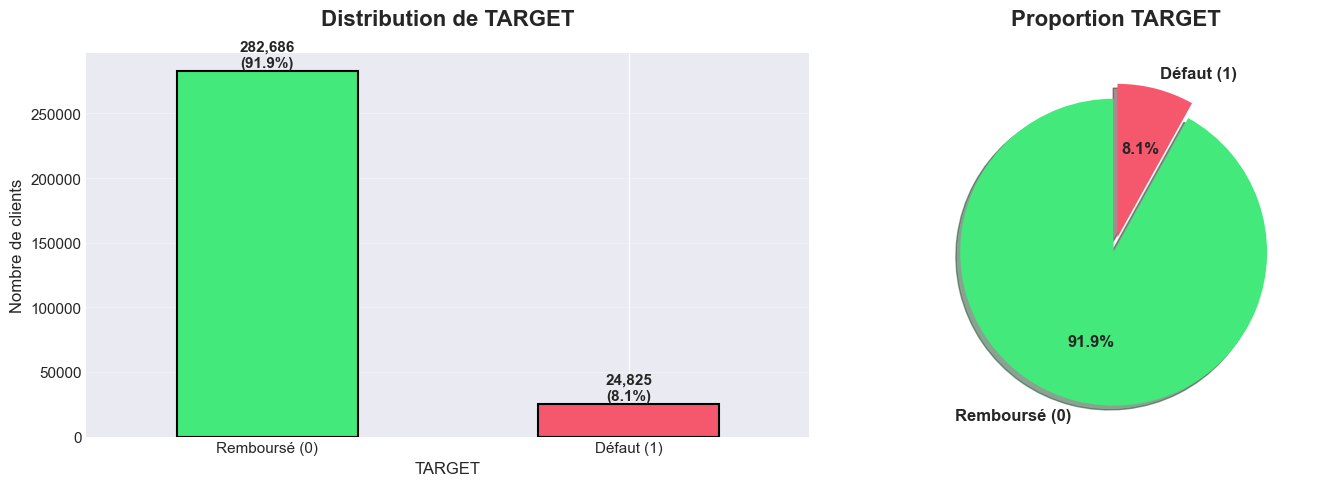

In [24]:
# Visualisation de TARGET
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Barplot
colors = ['#43e97b', '#f5576c']
target_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Distribution de TARGET', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('TARGET', fontsize=12)
axes[0].set_ylabel('Nombre de clients', fontsize=12)
axes[0].set_xticklabels(['Remboursé (0)', 'Défaut (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}\n({target_pct.values[i]:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Pie chart
axes[1].pie(
    target_counts.values,
    labels=['Remboursé (0)', 'Défaut (1)'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
axes[1].set_title('Proportion TARGET', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

<div class='info-box'>
    <h3 style='margin-top: 0;'>Insights TARGET</h3>
    <p><strong>Déséquilibre :</strong> 11.39:1 (91.9% remboursés vs 8.1% défauts)</p>
    <p><strong>Implications :</strong> Déséquilibre fort mais réaliste pour le secteur du crédit</p>
    <p><strong>Stratégie recommandée :</strong> <strong>class_weight='balanced'</strong> + optimisation du seuil de décision selon fonction de coût métier</p>
    <p><strong>Métriques à privilégier :</strong> F-beta (beta>1), AUC-ROC, AUC-PR, matrice de confusion avec coûts métier</p>
    <p><strong>Validation :</strong> Stratified K-Fold obligatoire pour préserver la proportion 92/8</p>
</div>

<hr class='divider'>

<div class='section-header'>
    <h2 style='margin: 0;'>📊 4. ANALYSE UNIVARIÉE</h2>
</div>

### 🔢 Variables numériques

In [25]:
# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['TARGET', 'SK_ID_CURR']]

print(f"Nombre de variables numériques : {len(numeric_cols)}")
print(f"\nListe des variables numériques (15 premières) :")
print(numeric_cols[:15])

Nombre de variables numériques : 166

Liste des variables numériques (15 premières) :
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE']


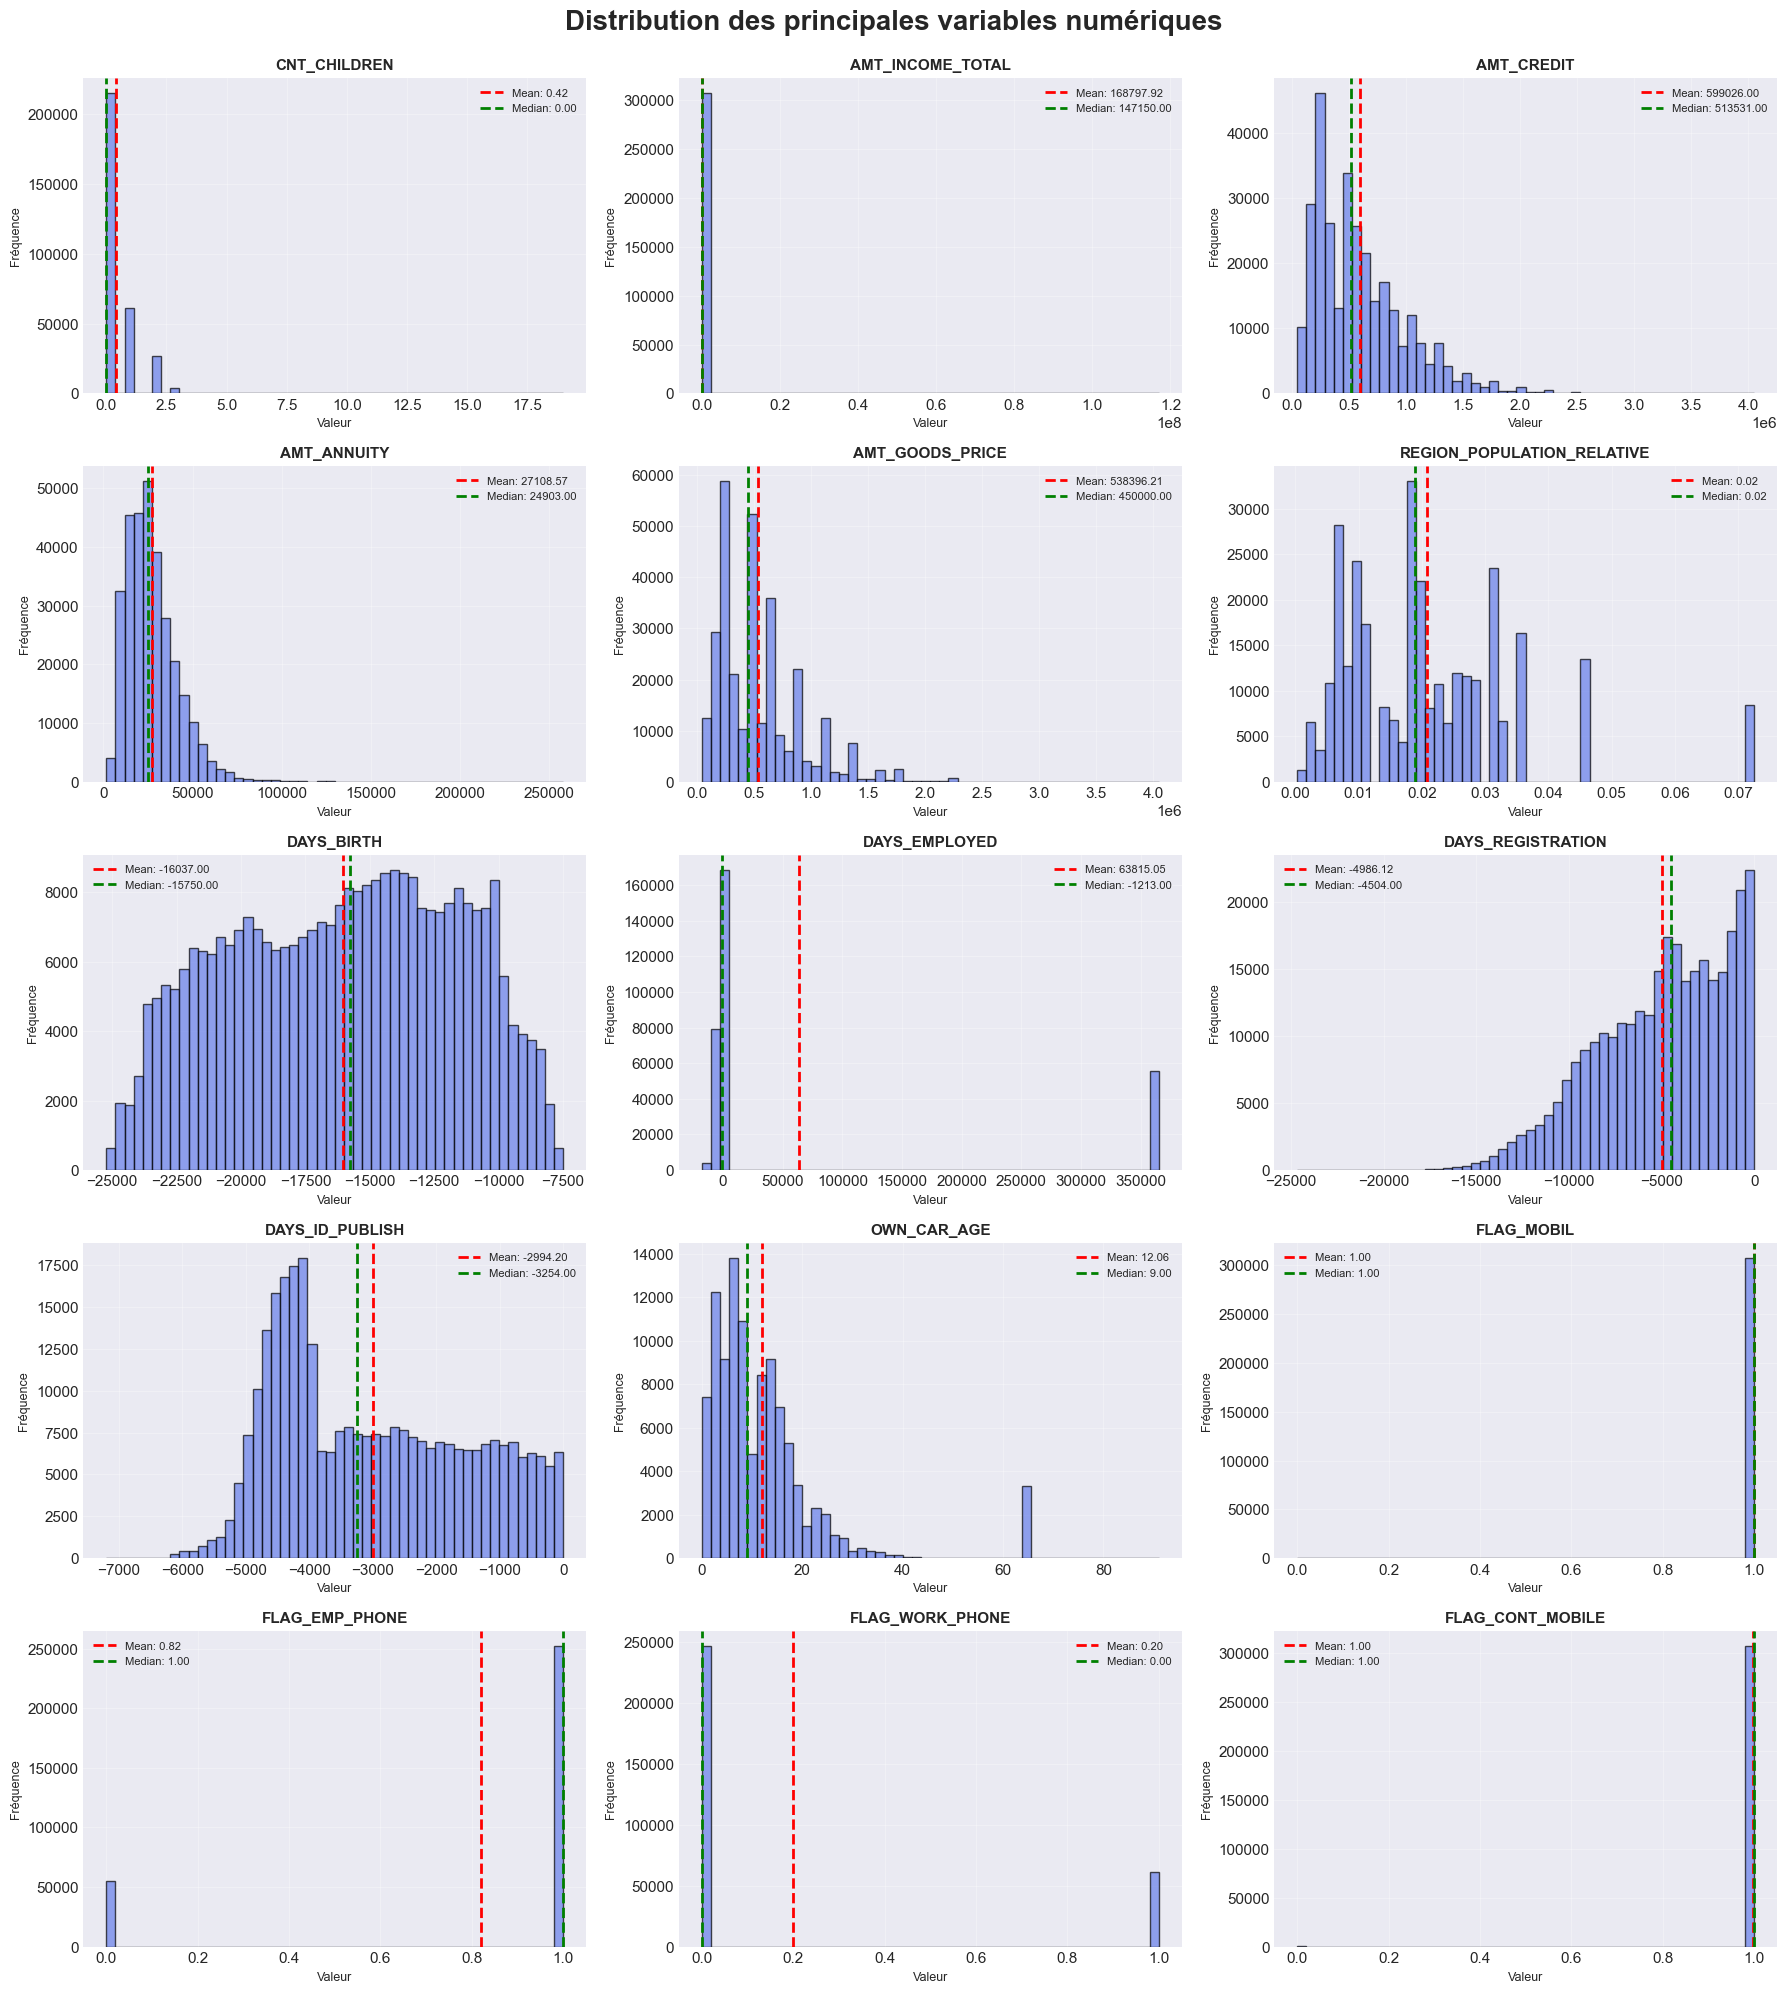

In [ ]:
# Distribution des principales variables numériques (top 15)
# Sélectionner les 15 premières variables numériques
top_vars = numeric_cols[:15]

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.ravel()

for idx, col in enumerate(top_vars):
    if idx < len(axes):
        # Retirer les valeurs infinies et NaN pour la visualisation
        data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
        
        axes[idx].hist(data, bins=50, color='#667eea', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Valeur', fontsize=9)
        axes[idx].set_ylabel('Fréquence', fontsize=9)
        axes[idx].grid(alpha=0.3)
        
        # Ajouter statistiques
        mean_val = data.mean()
        median_val = data.median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend(fontsize=8)

plt.suptitle('Distribution des principales variables numériques', fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

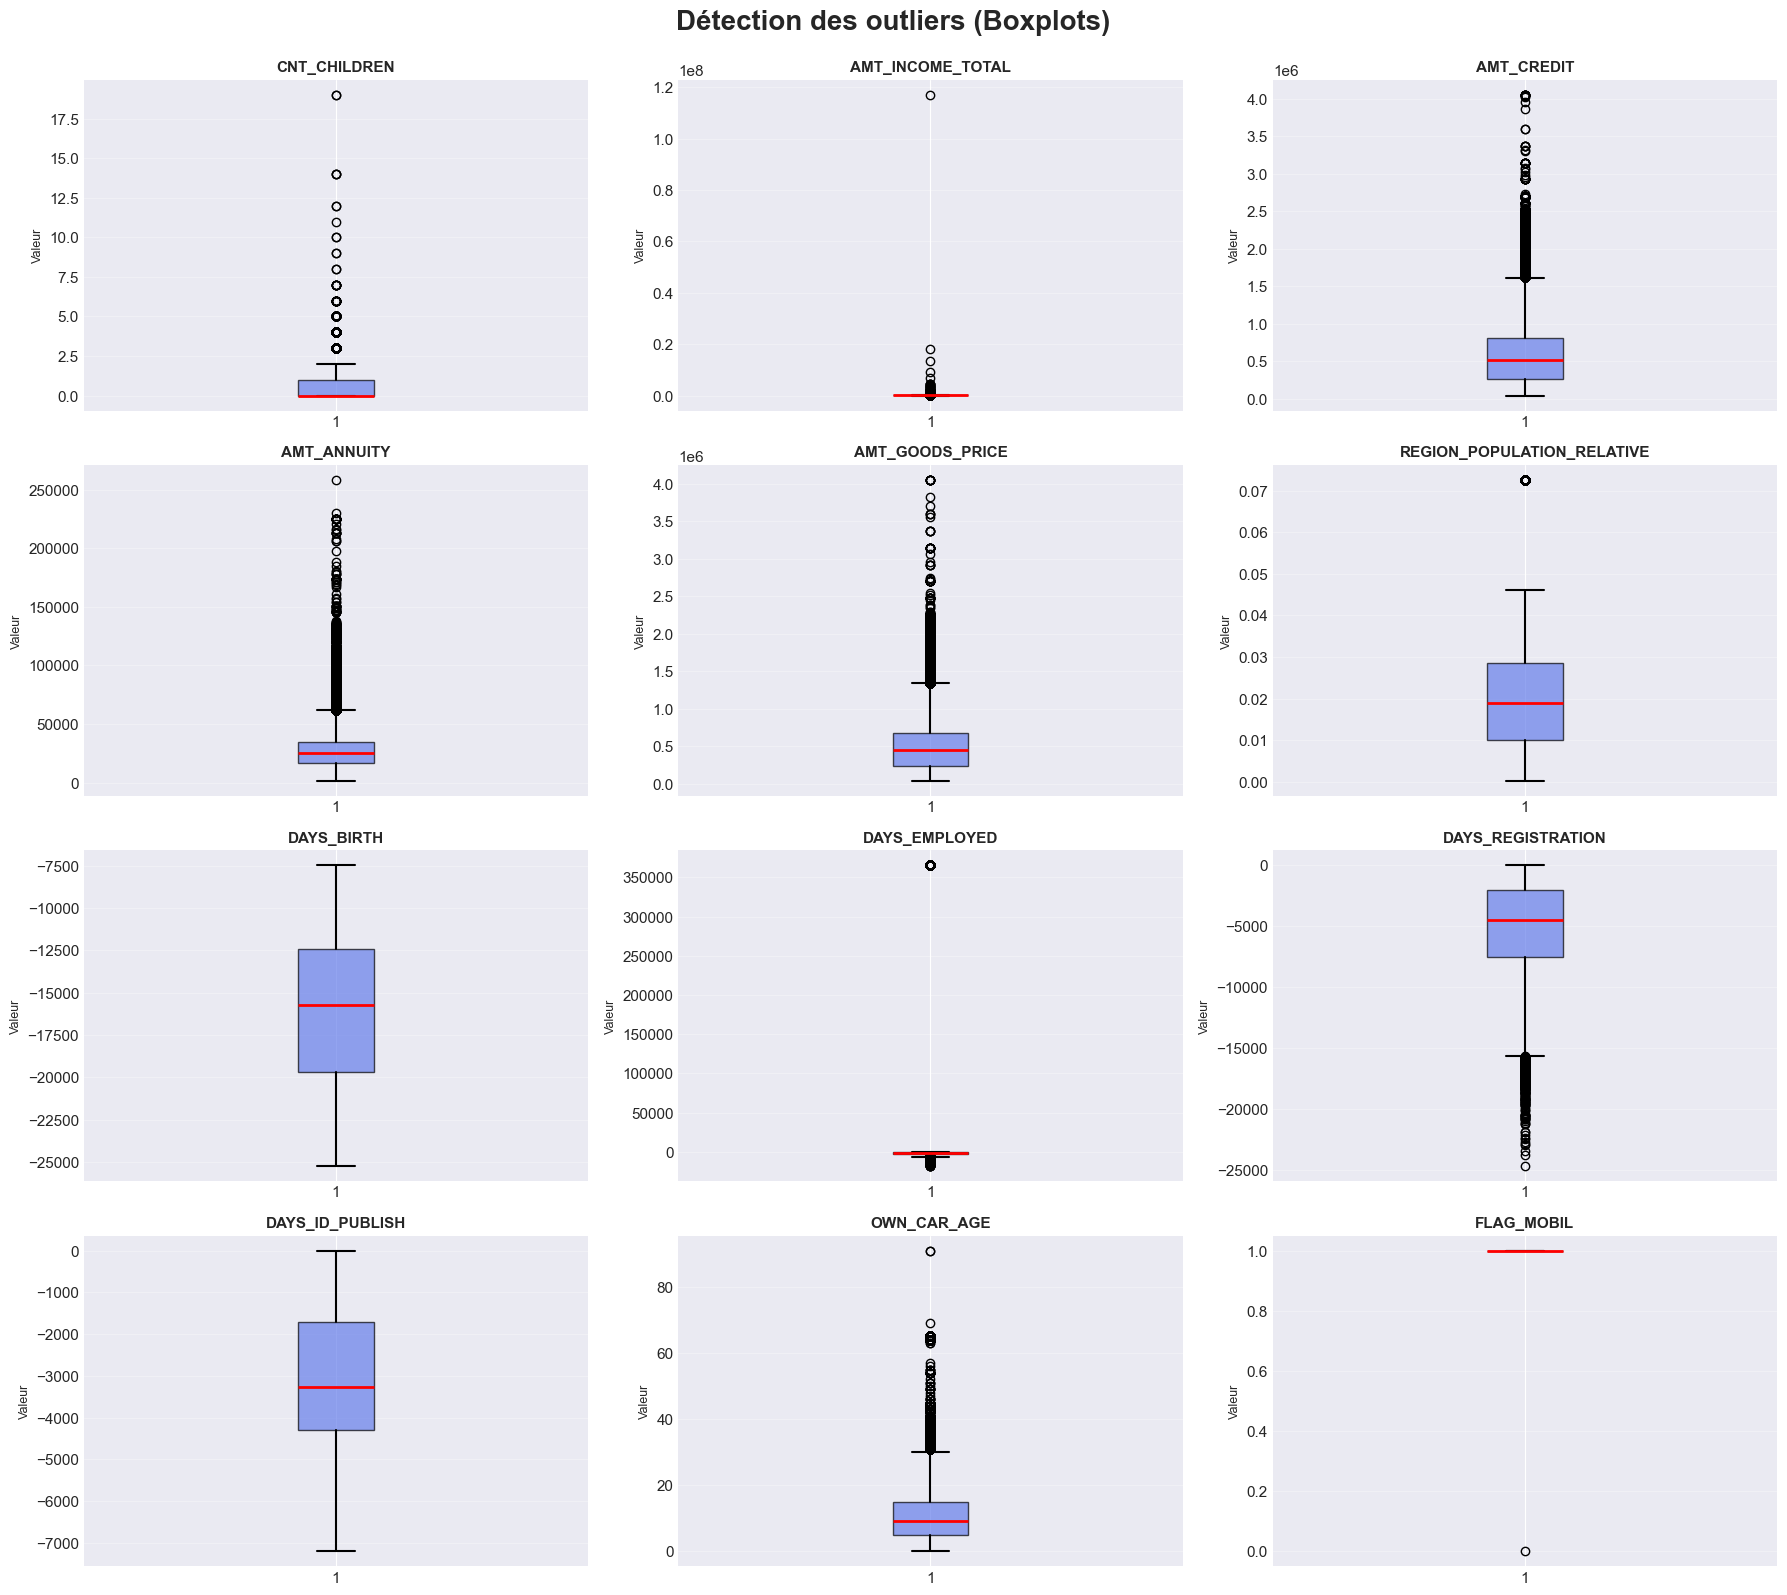

In [27]:
# Détection des outliers avec boxplots (top 12 variables)
top_vars_outliers = numeric_cols[:12]

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(top_vars_outliers):
    if idx < len(axes):
        data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
        
        bp = axes[idx].boxplot(data, vert=True, patch_artist=True, 
                              boxprops=dict(facecolor='#667eea', alpha=0.7),
                              medianprops=dict(color='red', linewidth=2),
                              whiskerprops=dict(color='black', linewidth=1.5),
                              capprops=dict(color='black', linewidth=1.5))
        
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Valeur', fontsize=9)
        axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Détection des outliers (Boxplots)', fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### 🏷️ Variables catégorielles

In [28]:
# Sélection des colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Nombre de variables catégorielles : {len(categorical_cols)}")
print(f"\nListe des variables catégorielles :")
print(categorical_cols)

Nombre de variables catégorielles : 16

Liste des variables catégorielles :
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


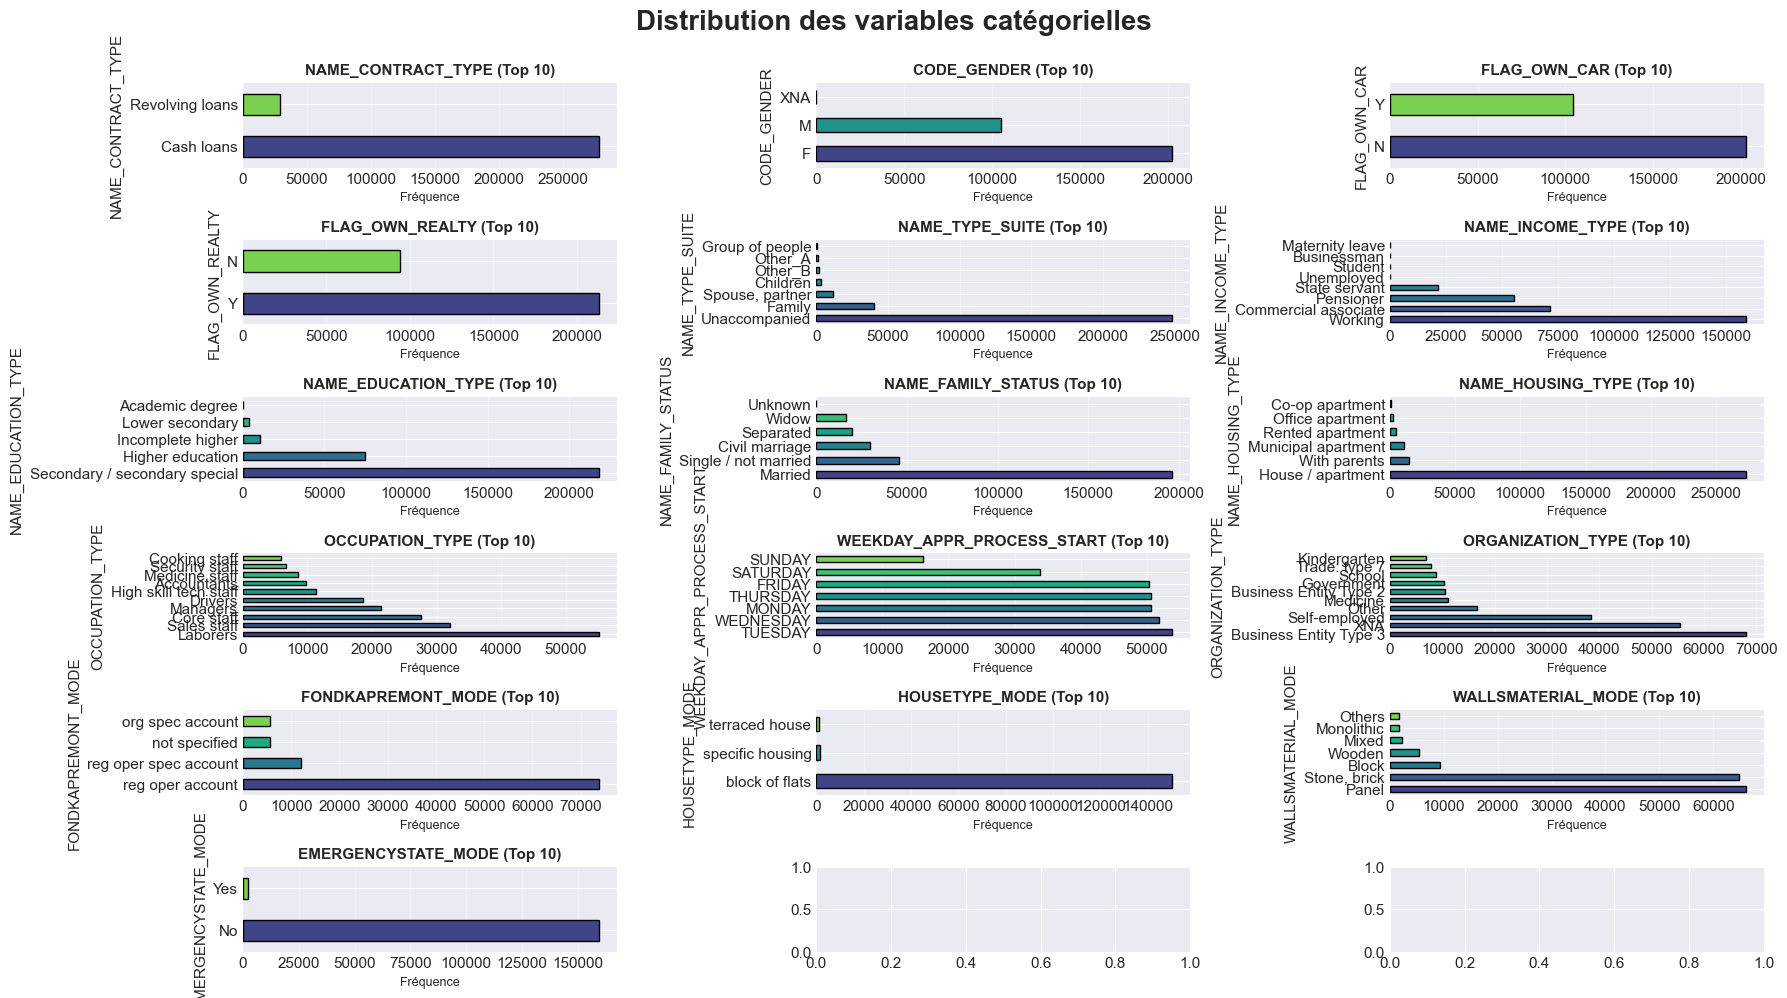

In [ ]:
# Distribution des variables catégorielles (si elles existent)
if len(categorical_cols) > 0:
    
    top_cat_vars = categorical_cols[:]
    
    fig, axes = plt.subplots(6, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(top_cat_vars):
        if idx < len(axes):
            top_categories = df[col].value_counts().head(10)
            
            colors_gradient = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_categories)))
            
            top_categories.plot(kind='barh', ax=axes[idx], color=colors_gradient, edgecolor='black')
            axes[idx].set_title(f'{col} (Top 10)', fontsize=11, fontweight='bold')
            axes[idx].set_xlabel('Fréquence', fontsize=9)
            axes[idx].grid(axis='x', alpha=0.3)
    
    plt.suptitle('Distribution des variables catégorielles', fontsize=20, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
else:
    print("Aucune variable catégorielle détectée (toutes encodées en numériques)")

<hr class='divider'>

<div class='section-header'>
    <h2 style='margin: 0;'>🔗 5. ANALYSE BIVARIÉE</h2>
</div>

<div class='info-box'>
    <h3 style='margin-top: 0;'>🎯 Objectif</h3>
    <p>Identifier les variables les plus corrélées avec TARGET pour prioriser le feature engineering.</p>
</div>

### 📈 Corrélations avec TARGET

In [32]:
#  Calcul des corrélations avec TARGET
correlations = df[numeric_cols + ['TARGET']].corr()['TARGET'].drop('TARGET').sort_values(ascending=False)

print("Top 20 variables les plus corrélées avec TARGET :")
print("\nCorrélations positives (augmentent le risque) :")
print(correlations.head(10))

print("\nCorrélations négatives (diminuent le risque) :")
print(correlations.tail(10))

Top 20 variables les plus corrélées avec TARGET :

Corrélations positives (augmentent le risque) :
BUREAU_DAYS_CREDIT_MEAN              0.089729
CC_AMT_BALANCE_MEAN                  0.087177
DAYS_BIRTH                           0.078239
BUREAU_DAYS_CREDIT_MIN               0.075248
BUREAU_BB_MONTHS_BALANCE_MIN_MIN     0.073225
BUREAU_CREDIT_ACTIVE_Active          0.067128
PREV_NAME_CONTRACT_STATUS_Refused    0.064469
REGION_RATING_CLIENT_W_CITY          0.060893
REGION_RATING_CLIENT                 0.058899
DAYS_LAST_PHONE_CHANGE               0.055218
Name: TARGET, dtype: float64

Corrélations négatives (diminuent le risque) :
PREV_AMT_ANNUITY_MEAN        -0.034871
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3 

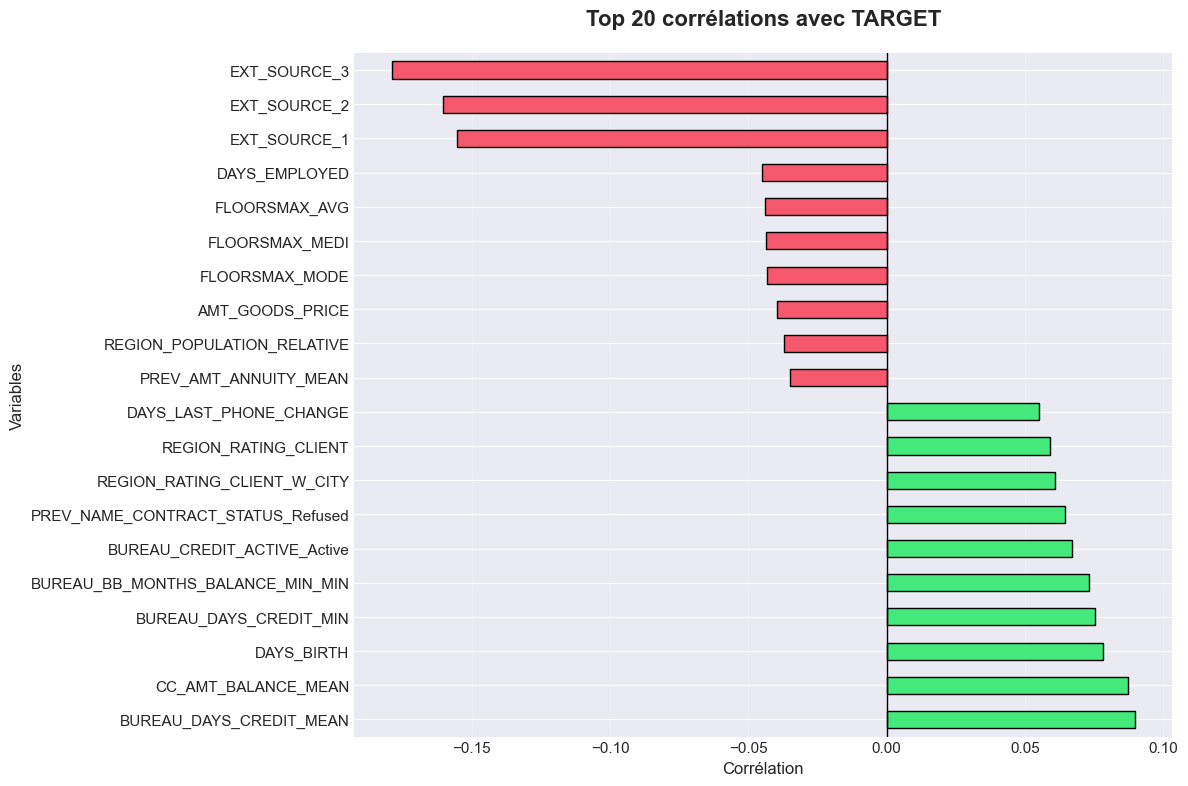

In [34]:
# Visualisation des corrélations avec TARGET
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#43e97b' if x > 0 else '#f5576c' for x in top_corr.values]
top_corr.plot(kind='barh', ax=ax, color=colors, edgecolor='black')

ax.set_title('Top 20 corrélations avec TARGET', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Corrélation', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)
ax.axvline(0, color='black', linewidth=1)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

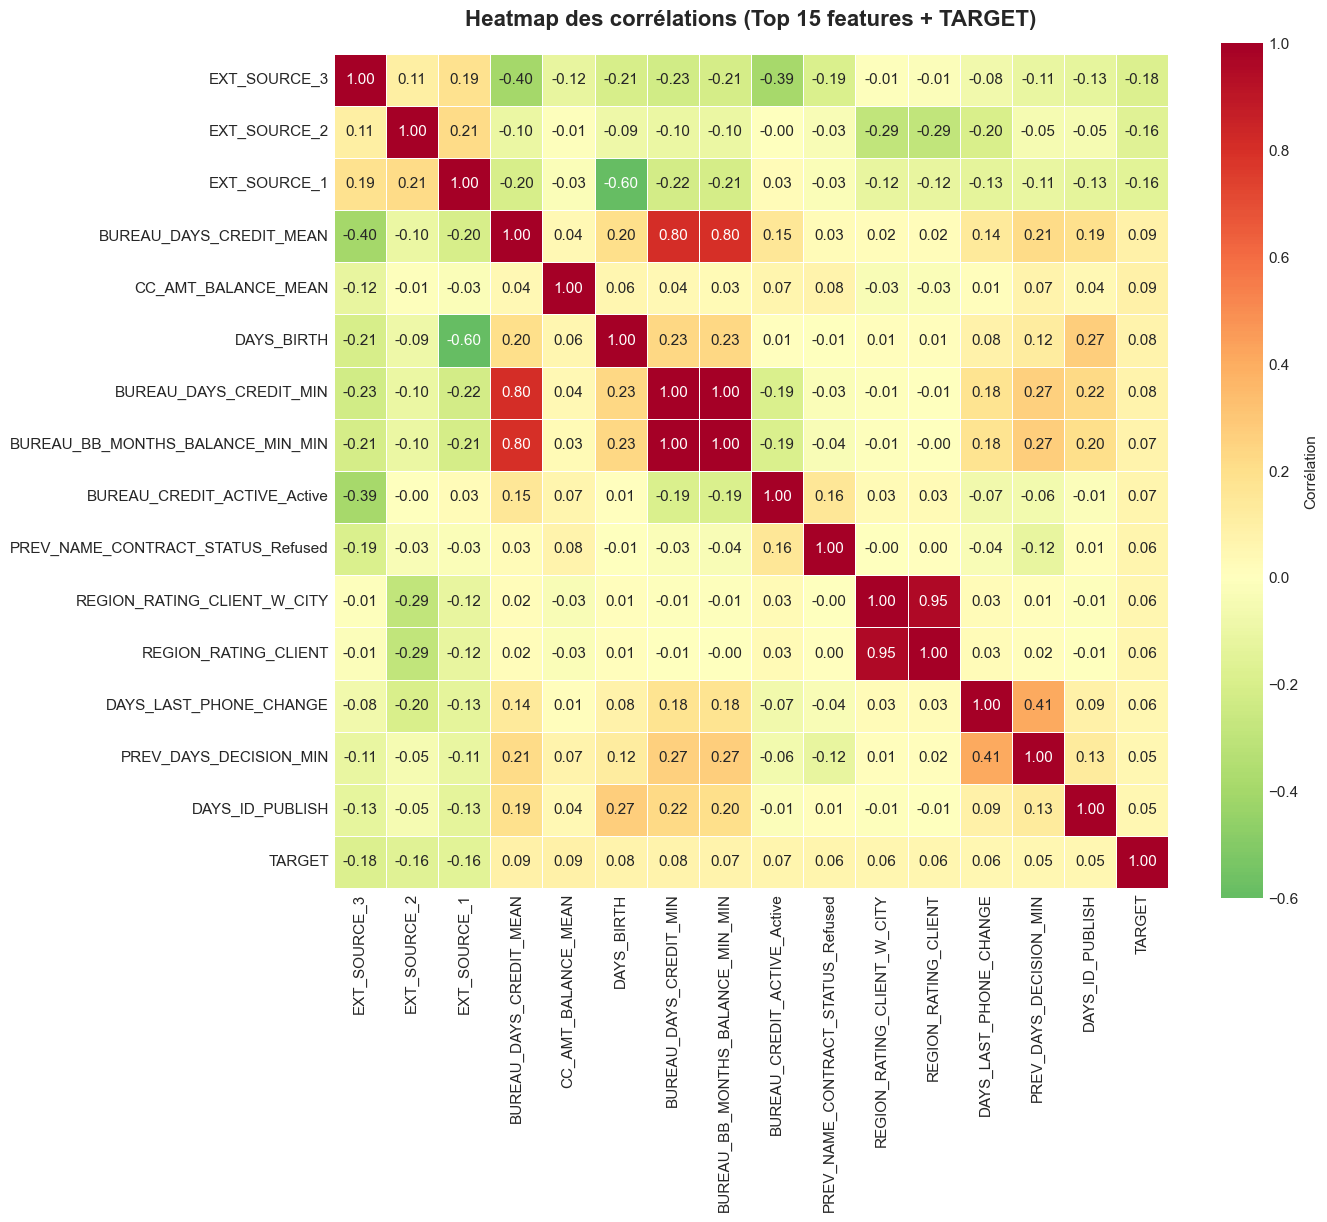

In [35]:
# Heatmap des corrélations entre top features
# Sélectionner les 15 features les plus corrélées avec TARGET (en valeur absolue)
top_15_features = correlations.abs().sort_values(ascending=False).head(15).index.tolist()

# Matrice de corrélation entre ces features + TARGET
corr_matrix = df[top_15_features + ['TARGET']].corr()

fig, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn_r',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Corrélation'},
    ax=ax
)

ax.set_title('Heatmap des corrélations (Top 15 features + TARGET)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 📊 Distributions par TARGET (0 vs 1)

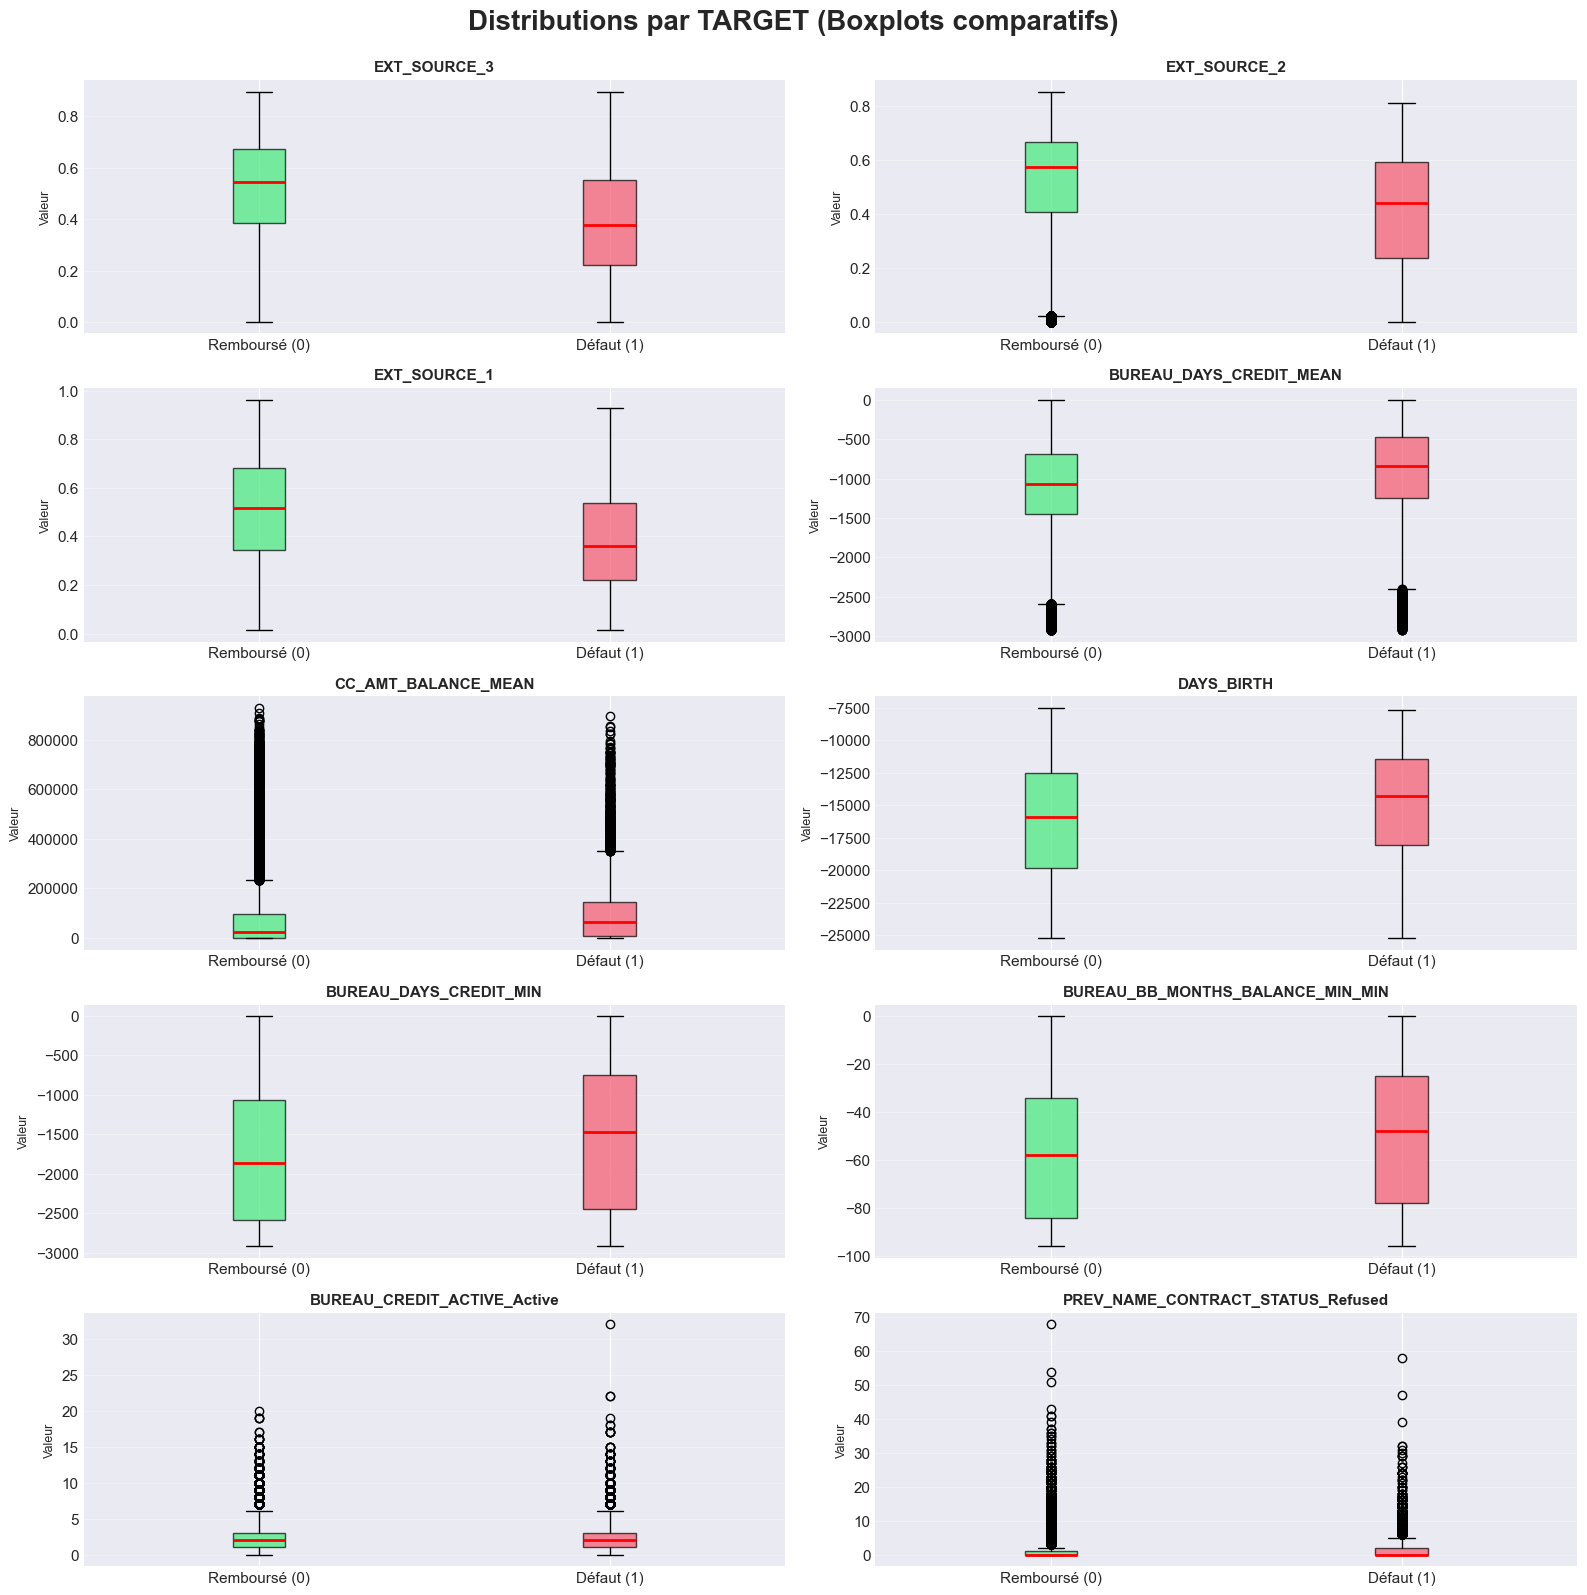

In [38]:
# Boxplots comparatifs (top 10 features) par TARGET
top_10_features = correlations.abs().sort_values(ascending=False).head(10).index.tolist()

fig, axes = plt.subplots(5, 2, figsize=(16, 16))
axes = axes.ravel()

for idx, col in enumerate(top_10_features):
    if idx < len(axes):
        # Données par classe TARGET
        data_0 = df[df['TARGET'] == 0][col].replace([np.inf, -np.inf], np.nan).dropna()
        data_1 = df[df['TARGET'] == 1][col].replace([np.inf, -np.inf], np.nan).dropna()
        
        bp = axes[idx].boxplot(
            [data_0, data_1],
            labels=['Remboursé (0)', 'Défaut (1)'],
            patch_artist=True,
            boxprops=dict(alpha=0.7),
            medianprops=dict(color='red', linewidth=2)
        )
        
        # Colorer les boxes
        bp['boxes'][0].set_facecolor('#43e97b')
        bp['boxes'][1].set_facecolor('#f5576c')
        
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Valeur', fontsize=9)
        axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distributions par TARGET (Boxplots comparatifs)', fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

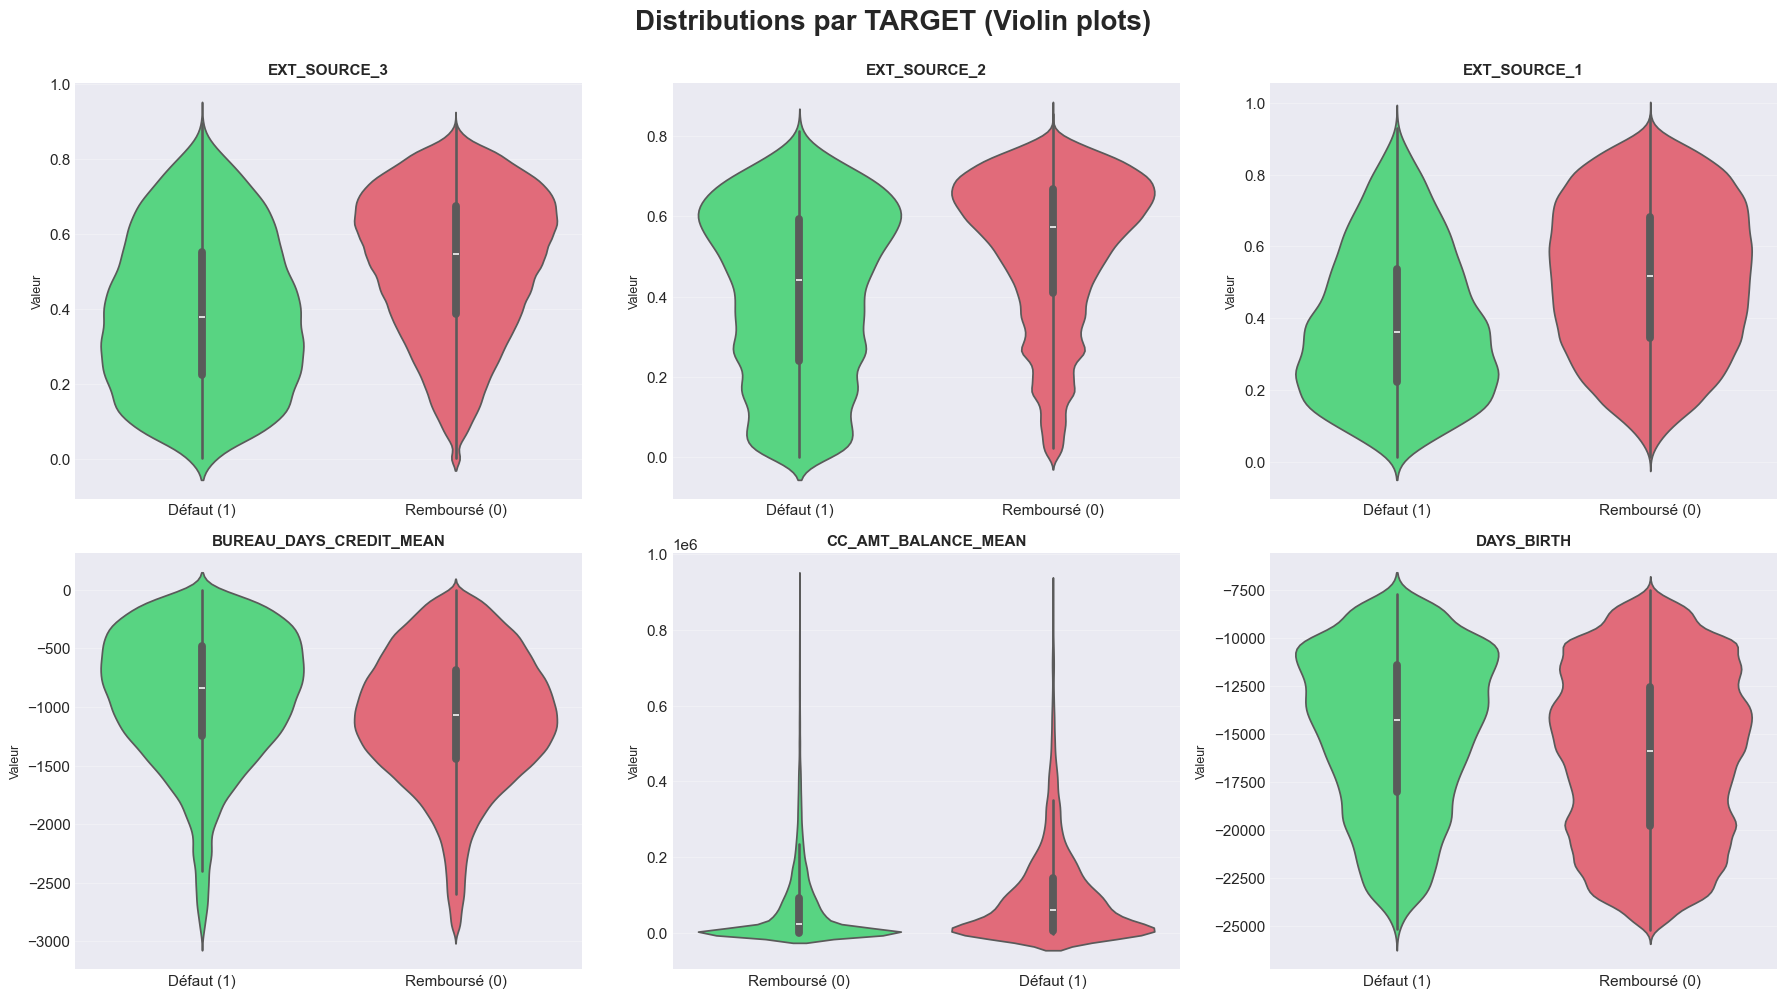

In [37]:
# Violin plots (top 6 features) par TARGET
top_6_features = correlations.abs().sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(top_6_features):
    if idx < len(axes):
        # Créer un dataframe temporaire pour seaborn
        temp_df = df[[col, 'TARGET']].copy()
        temp_df = temp_df.replace([np.inf, -np.inf], np.nan).dropna()
        temp_df['TARGET'] = temp_df['TARGET'].map({0: 'Remboursé (0)', 1: 'Défaut (1)'})
        
        sns.violinplot(
            data=temp_df,
            x='TARGET',
            y=col,
            palette=['#43e97b', '#f5576c'],
            ax=axes[idx]
        )
        
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('', fontsize=9)
        axes[idx].set_ylabel('Valeur', fontsize=9)
        axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distributions par TARGET (Violin plots)', fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [39]:
# Analyse des variables catégorielles vs TARGET
print("Analyse des variables catégorielles par rapport à TARGET")
print("=" * 60)

for col in categorical_cols:
    print(f"\n{col}:")
    print("-" * 60)
    
    # Crosstab avec pourcentages
    ct = pd.crosstab(df[col], df['TARGET'], normalize='index') * 100
    ct.columns = ['Remboursé (%)', 'Défaut (%)']
    ct['Total'] = df[col].value_counts()
    
    # Trier par taux de défaut décroissant
    ct = ct.sort_values('Défaut (%)', ascending=False)
    
    # Afficher top 10 catégories
    print(ct.head(10))
    print(f"\nTaux de défaut global : {df['TARGET'].mean() * 100:.2f}%")

Analyse des variables catégorielles par rapport à TARGET

NAME_CONTRACT_TYPE:
------------------------------------------------------------
                    Remboursé (%)  Défaut (%)   Total
NAME_CONTRACT_TYPE                                   
Cash loans              91.654087    8.345913  278232
Revolving loans         94.521671    5.478329   29279

Taux de défaut global : 8.07%

CODE_GENDER:
------------------------------------------------------------
             Remboursé (%)  Défaut (%)   Total
CODE_GENDER                                   
M                89.858080   10.141920  105059
F                93.000672    6.999328  202448
XNA             100.000000    0.000000       4

Taux de défaut global : 8.07%

FLAG_OWN_CAR:
------------------------------------------------------------
              Remboursé (%)  Défaut (%)   Total
FLAG_OWN_CAR                                   
N                 91.499773    8.500227  202924
Y                 92.756270    7.243730  104587

Taux

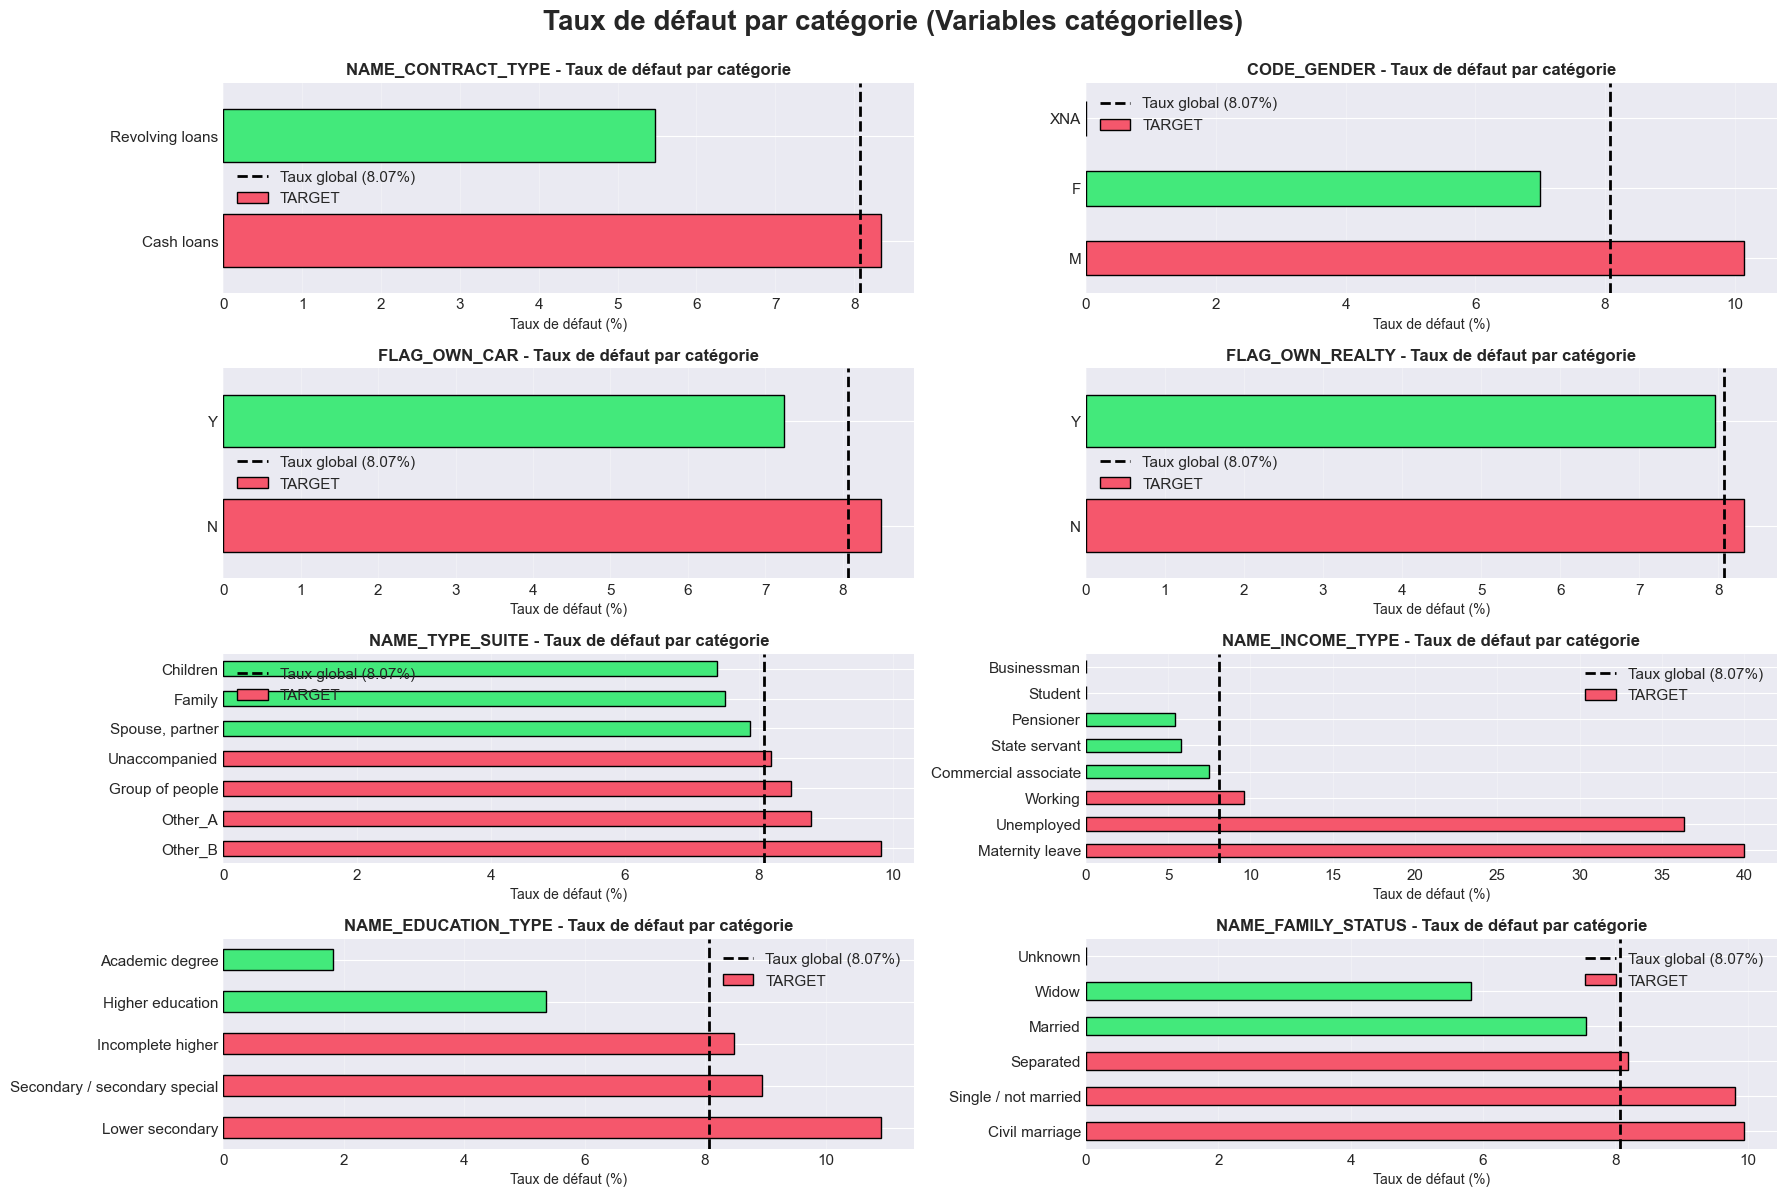

In [ ]:
# Visualisation des taux de défaut par catégorie (top 8 variables)
top_cat_vars = categorical_cols[:8] if len(categorical_cols) >= 4 else categorical_cols

fig, axes = plt.subplots(4, 2, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(top_cat_vars):
    if idx < len(axes):
        # Calculer le taux de défaut par catégorie
        default_rate = df.groupby(col)['TARGET'].mean() * 100
        counts = df[col].value_counts()
        
        # Prendre les 10 catégories les plus fréquentes
        top_10_cats = counts.head(10).index
        default_rate_top10 = default_rate[top_10_cats].sort_values(ascending=False)
        
        # Créer le barplot
        colors_bar = ['#f5576c' if x > 8.07 else '#43e97b' for x in default_rate_top10.values]
        default_rate_top10.plot(kind='barh', ax=axes[idx], color=colors_bar, edgecolor='black')
        
        # Ligne de référence (taux global)
        axes[idx].axvline(8.07, color='black', linestyle='--', linewidth=2, label='Taux global (8.07%)')
        
        axes[idx].set_title(f'{col} - Taux de défaut par catégorie', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Taux de défaut (%)', fontsize=10)
        axes[idx].set_ylabel('', fontsize=10)
        axes[idx].legend()
        axes[idx].grid(axis='x', alpha=0.3)

plt.suptitle('Taux de défaut par catégorie (Variables catégorielles)', fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

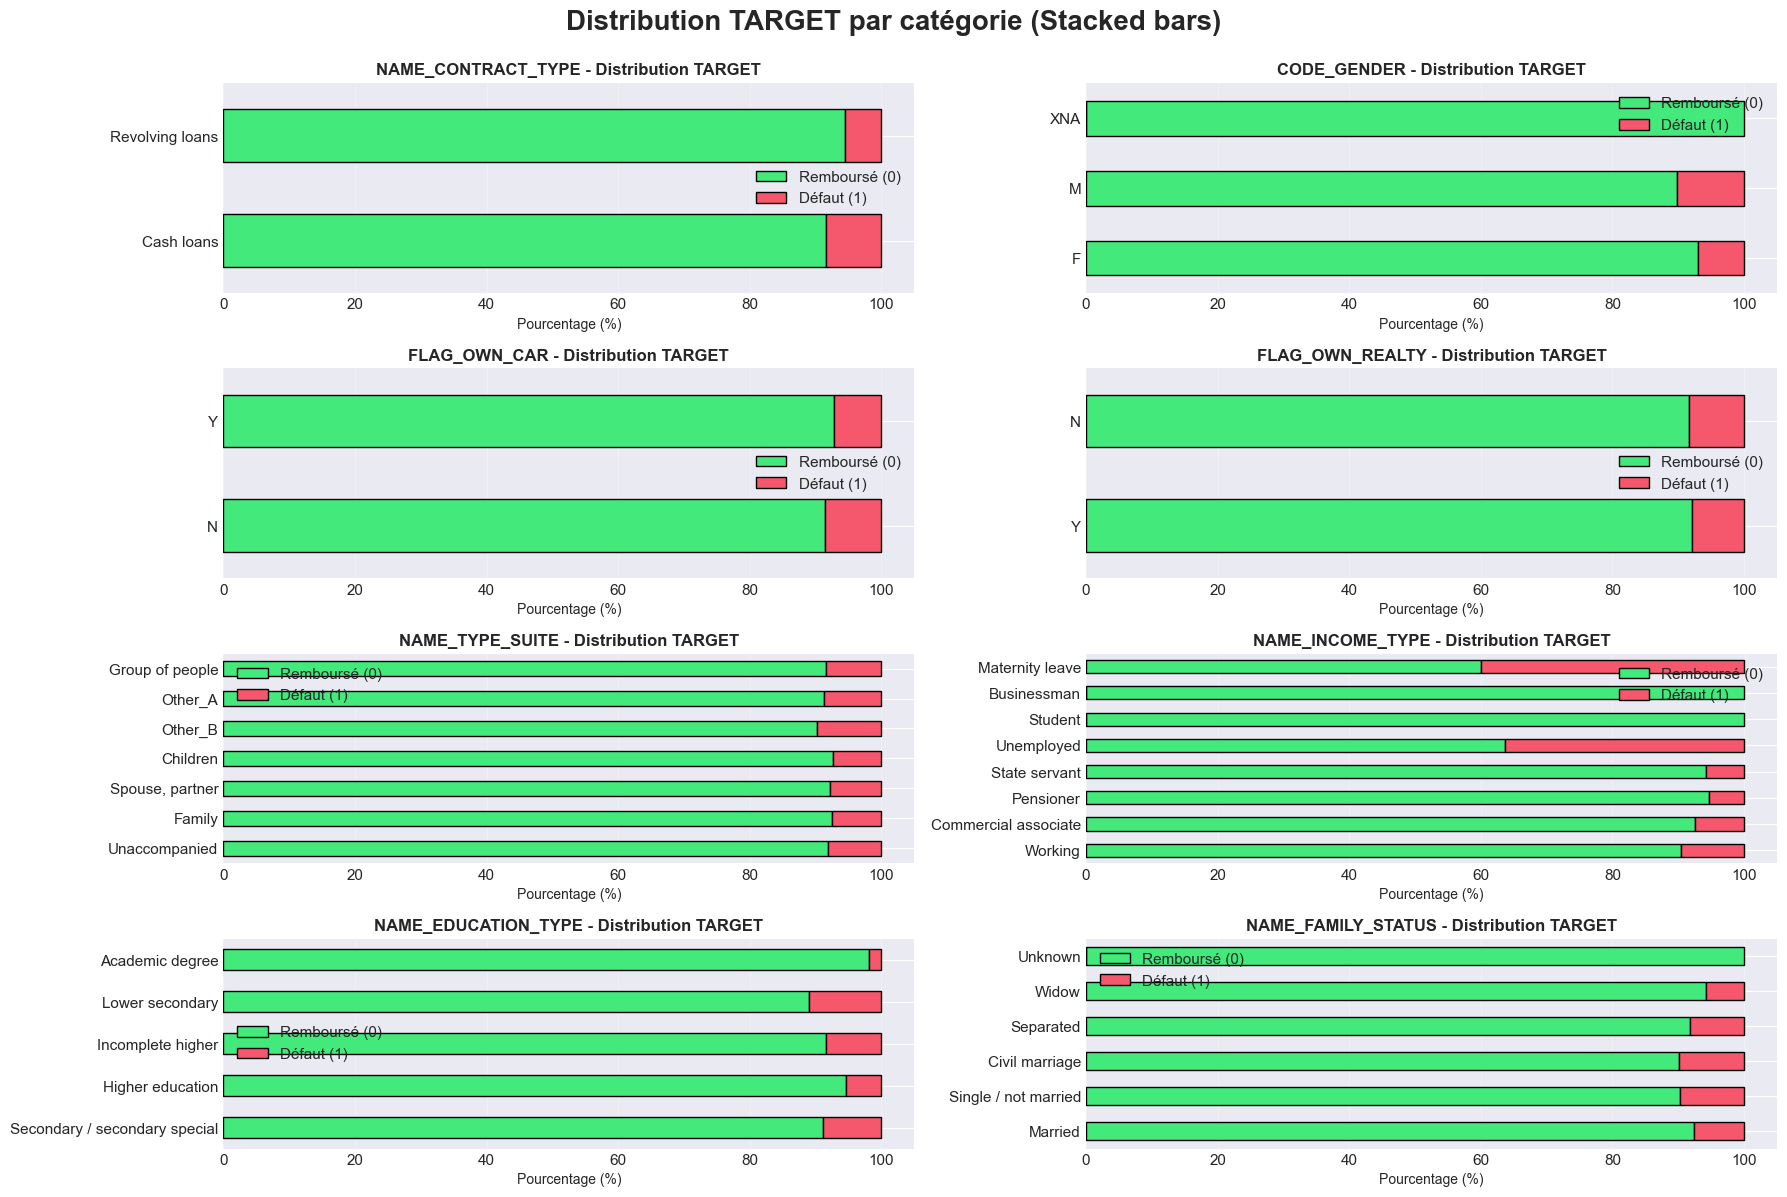

In [43]:
#  Stacked bar chart (distribution TARGET par catégorie)
top_cat_vars = categorical_cols[:8] if len(categorical_cols) >= 8 else categorical_cols

fig, axes = plt.subplots(4, 2, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(top_cat_vars):
    if idx < len(axes):
        # Crosstab
        ct = pd.crosstab(df[col], df['TARGET'], normalize='index') * 100
        
        # Prendre top 10 catégories les plus fréquentes
        top_10_cats = df[col].value_counts().head(10).index
        ct_top10 = ct.loc[top_10_cats]
        
        # Stacked bar chart
        ct_top10.plot(
            kind='barh',
            stacked=True,
            ax=axes[idx],
            color=['#43e97b', '#f5576c'],
            edgecolor='black',
            legend=True
        )
        
        axes[idx].set_title(f'{col} - Distribution TARGET', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Pourcentage (%)', fontsize=10)
        axes[idx].set_ylabel('', fontsize=10)
        axes[idx].legend(['Remboursé (0)', 'Défaut (1)'], loc='best')
        axes[idx].grid(axis='x', alpha=0.3)

plt.suptitle('Distribution TARGET par catégorie (Stacked bars)', fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

<hr class='divider'>

<div class='section-header'>
    <h2 style='margin: 0;'>🔍 6. PATTERNS & INSIGHTS</h2>
</div>

<div class='info-box'>
    <h3 style='margin-top: 0;'>💡 Objectif</h3>
    <p>Synthétiser les découvertes clés et identifier les patterns métier importants.</p>
</div>

### 🎯 Features les plus importantes

**Variables numériques (Top 10 corrélations absolues)**

In [44]:
# Cellule : Tableau récapitulatif des top features
top_15_corr = correlations.abs().sort_values(ascending=False).head(15)

summary_df = pd.DataFrame({
    'Feature': top_15_corr.index,
    'Corrélation': correlations[top_15_corr.index].values,
    'Corrélation_abs': top_15_corr.values,
    'Missing_%': [df[col].isna().mean() * 100 for col in top_15_corr.index]
})

summary_df['Action_recommandée'] = summary_df.apply(
    lambda row: 'Imputer médiane + HAS_feature' if row['Missing_%'] > 30 
    else 'Imputer médiane' if row['Missing_%'] > 0 
    else 'Conserver tel quel', axis=1
)

print("Top 15 features numériques les plus prédictives :")
summary_df

Top 15 features numériques les plus prédictives :


,Feature,Corrélation,Corrélation_abs,Missing_%,Action_recommandée
0,EXT_SOURCE_3,-0.178919,0.178919,19.825307,Imputer médiane
1,EXT_SOURCE_2,-0.160472,0.160472,0.214626,Imputer médiane
2,EXT_SOURCE_1,-0.155317,0.155317,56.381073,Imputer médiane + HAS_feature
3,BUREAU_DAYS_CREDIT_MEAN,0.089729,0.089729,14.314935,Imputer médiane
4,CC_AMT_BALANCE_MEAN,0.087177,0.087177,71.739222,Imputer médiane + HAS_feature
5,DAYS_BIRTH,0.078239,0.078239,0.000000,Conserver tel quel
6,BUREAU_DAYS_CREDIT_MIN,0.075248,0.075248,14.314935,Imputer médiane
7,BUREAU_BB_MONTHS_BALANCE_MIN_MIN,0.073225,0.073225,70.007252,Imputer médiane + HAS_feature
8,BUREAU_CREDIT_ACTIVE_Active,0.067128,0.067128,14.314935,Imputer médiane
9,PREV_NAME_CONTRACT_STATUS_Refused,0.064469,0.064469,5.350703,Imputer médiane


**Variables catégorielles (Impact fort sur TARGET)**



| Variable | Catégorie à risque | Taux défaut | Impact vs global |
|----------|-------------------|-------------|------------------|
| **NAME_INCOME_TYPE** | Maternity leave | 40.0% | +395% |
| **NAME_INCOME_TYPE** | Unemployed | 36.4% | +351% |
| **OCCUPATION_TYPE** | Low-skill Laborers | 17.2% | +113% |
| **ORGANIZATION_TYPE** | Transport: type 3 | 15.8% | +96% |
| **NAME_HOUSING_TYPE** | Rented apartment | 12.3% | +53% |
| **NAME_EDUCATION_TYPE** | Lower secondary | 10.9% | +35% |
| **CODE_GENDER** | M (Hommes) | 10.1% | +25% |

**Action recommandée :** Encoder ces variables (Target Encoding ou One-Hot selon cardinalité)


### ⚠️ Outliers critiques

**Stratégies de traitement des outliers :**

- **Winsorization** : Plafonner aux percentiles 1 et 99 pour variables continues (ex: AMT_INCOME_TOTAL)
- **Log transformation** : Pour variables avec distribution asymétrique (ex: AMT_CREDIT, AMT_GOODS_PRICE)
- **Suppression** : Si valeurs aberrantes confirmées (ex: DAYS_EMPLOYED avec valeurs positives)
- **Cap manuel** : Pour variables avec seuils métier connus

### 💼 Patterns métier

**1. Profil client à haut risque**

Combinaison de facteurs augmentant significativement le risque :
- Statut professionnel précaire (Unemployed, Maternity leave)
- Faible niveau d'éducation (Lower secondary)
- Occupation manuelle peu qualifiée (Low-skill laborers, Drivers)
- Logement en location (Rented apartment, With parents)
- Secteur d'activité à risque (Transport, Restaurant, Construction)
- Genre masculin (10.1% vs 7.0% pour femmes)

**2. Profil client sécurisé**

- Revenus stables (Pensioner, State servant : ~5.5% défaut)
- Niveau d'éducation élevé (Academic degree : 1.8% défaut)
- Propriétaire immobilier (7.8% vs 12.3% pour locataires)
- Emploi qualifié (Accountants, Managers, HR staff)

**3. Sources de données et historique**

- **85.7%** des clients ont un historique Credit Bureau
- **94.6%** ont des demandes précédentes chez Home Credit
- **28.3%** seulement ont une carte de crédit
- Avoir un historique chez Home Credit multiplie par **7** la probabilité d'avoir une carte de crédit

**Insight clé :** Home Credit pratique l'**inclusion financière** en acceptant des clients sans historique externe

**4. Variables temporelles**


**5. Ratios métier à créer (Feature Engineering)**

Ratios recommandés basés sur la logique métier :
- `CREDIT_INCOME_RATIO` = AMT_CREDIT / AMT_INCOME_TOTAL
- `ANNUITY_INCOME_RATIO` = AMT_ANNUITY / AMT_INCOME_TOTAL
- `CREDIT_GOODS_RATIO` = AMT_CREDIT / AMT_GOODS_PRICE
- `DAYS_EMPLOYED_RATIO` = DAYS_EMPLOYED / DAYS_BIRTH (stabilité)
- `EXT_SOURCE_MEAN` = Moyenne des 3 scores externes

<hr class='divider'>

<div class='section-header'>
    <h2 style='margin: 0;'>✅ 7. CONCLUSIONS & PROCHAINES ÉTAPES</h2>
</div>

<div class='success-box'>
    <h3 style='margin-top: 0;'>Résumé des découvertes</h3>
    <ul>
        <li><strong>Déséquilibre des classes</strong> : 11.39:1 (91.9% remboursés vs 8.1% défauts) → Stratégie : class_weight='balanced' + optimisation seuil</li>
        <li><strong>Valeurs manquantes</strong> : 131 colonnes avec NaN (71% > 30%) → Validées comme LÉGITIMES (LEFT JOIN, variables conditionnelles)</li>
        <li><strong>Top features numériques</strong> : EXT_SOURCE (scores externes), DAYS_BIRTH, DAYS_EMPLOYED, ratios crédit/revenu</li>
        <li><strong>Top features catégorielles</strong> : NAME_INCOME_TYPE (impact +395%), OCCUPATION_TYPE (+113%), NAME_EDUCATION_TYPE, ORGANIZATION_TYPE</li>
        <li><strong>Outliers</strong> : Variables AMT_* et DAYS_* nécessitent winsorization ou log transform</li>
    </ul>
</div>

<div class='warning-box'>
    <h3 style='margin-top: 0;'>Plan d'action pour Phase 3 - Preprocessing & Feature Engineering</h3>
    <p><strong>1. Traitement des valeurs manquantes</strong></p>
    <ul>
        <li>Créer features binaires : HAS_BUREAU, HAS_CC, HAS_PREV, HAS_EXT_SOURCE_*</li>
        <li>Tables auxiliaires → Imputer par 0</li>
        <li>Variables conditionnelles (OWN_CAR_AGE) → Imputer par -1</li>
        <li>Variables catégorielles → Catégorie "Unknown"</li>
        <li>Scores externes → Imputer par médiane</li>
        <li>Variables immobilières → Imputer par médiane ou supprimer si non prédictives</li>
    </ul>
    <p><strong>2. Traitement des outliers</strong></p>
    <ul>
        <li>Winsorization (percentiles 1-99) : AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY</li>
        <li>Log transformation : Variables asymétriques (AMT_GOODS_PRICE, AMT_CREDIT)</li>
        <li>Correction DAYS_EMPLOYED : Valeurs positives aberrantes à traiter</li>
    </ul>
    <p><strong>3. Feature Engineering métier</strong></p>
    <ul>
        <li>Ratios financiers : CREDIT_INCOME_RATIO, ANNUITY_INCOME_RATIO, CREDIT_GOODS_RATIO</li>
        <li>Variables temporelles : AGE (depuis DAYS_BIRTH), EMPLOYMENT_RATIO</li>
        <li>Agrégations scores externes : EXT_SOURCE_MEAN, EXT_SOURCE_WEIGHTED</li>
        <li>Interactions : INCOME × EDUCATION, OCCUPATION × ORGANIZATION</li>
    </ul>
    <p><strong>4. Encodage des variables catégorielles</strong></p>
    <ul>
        <li>Target Encoding : Variables à forte cardinalité (OCCUPATION_TYPE, ORGANIZATION_TYPE)</li>
        <li>One-Hot Encoding : Variables à faible cardinalité (CODE_GENDER, FLAG_OWN_CAR, NAME_EDUCATION_TYPE)</li>
    </ul>
    <p><strong>5. Normalisation</strong></p>
    <ul>
        <li>StandardScaler pour algorithmes sensibles (Logistic Regression)</li>
        <li>Pas nécessaire pour tree-based models (LightGBM, XGBoost, Random Forest)</li>
    </ul>
</div>

<div class='info-box'>
    <h3 style='margin-top: 0;'>Métriques à prioriser</h3>
    <p><strong>Compte tenu du déséquilibre (11.39:1) et du contexte métier :</strong></p>
    <ul>
        <li><span class='badge badge-warning'>Métrique principale</span> : <strong>Fonction de coût métier</strong> (Coût refuser bon client ≠ Coût accepter mauvais client)</li>
        <li><span class='badge badge-primary'>Métriques secondaires</span> : 
            <ul>
                <li>AUC-ROC (performance globale)</li>
                <li>AUC-PR (Precision-Recall, adapté au déséquilibre)</li>
                <li>F-beta score (beta=2 pour privilégier Recall)</li>
                <li>Matrice de confusion avec seuil optimisé</li>
            </ul>
        </li>
        <li><strong>Validation</strong> : Stratified K-Fold (5-10 folds) pour préserver le ratio 92/8</li>
        <li><strong>Attention</strong> : Ne PAS utiliser Accuracy (biaisée par le déséquilibre)</li>
    </ul>
</div>

<div style='background-color: rgba(219, 252, 230, 0.2); padding: 20px; border-radius: 10px; margin-top: 20px; border-left: 4px solid #89f7ae;'>
    <h3 style='margin-top: 0;'>Points clés à retenir</h3>
    <ul>
        <li><strong>Profil à haut risque</strong> : Unemployed/Maternity leave + Low education + Rented housing + Low-skill occupation</li>
        <li><strong>Profil sécurisé</strong> : Pensioner/State servant + Higher education + Home owner + Qualified occupation</li>
        <li><strong>Variables les plus prédictives</strong> : NAME_INCOME_TYPE, EXT_SOURCE_*, OCCUPATION_TYPE, AMT_CREDIT/INCOME ratios</li>
        <li><strong>Biais à surveiller</strong> : Disparité genre (10.1% vs 7.0%), statut marital</li>
        <li><strong>Stratégie d'inclusion</strong> : Home Credit accepte 94.6% clients avec historique interne vs 85.7% avec historique externe</li>
    </ul>
</div>

<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(0,0,0,0.3); text-align: center; margin-top: 50px;'>
    <h2 style='color: white; margin: 0; font-size: 32px; font-weight: 800;'>🎯 FIN DE L'ANALYSE EXPLORATOIRE</h2>
</div>